<a href="https://colab.research.google.com/github/HumnaArshad19/Assesment_PDA/blob/main/AssessmentProgrammingDraft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMP7005 – Programming for Data Analysis**  
## **PRAC1: From Data to Application Development**

This notebook presents my solution for the PRAC1 coursework.The aim is to use Python to handle and analyse the India air quality dataset, build a predictive model, and develop a simple multipage application for data exploration and forecasting, while using GitHub for version control.


In [351]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

In [352]:
#from google.colab import drive
#drive.mount('/content/drive')

In [353]:
#%cd '/content/drive/MyDrive/programmingModule/Assessment Data-20251027'

In [354]:
#%ls # it shows all the content of folder

In [355]:
! git config --global user.name "HumnaArshad19"
! git config --global user.email "Humnaarshad19@gmail.com"

In [356]:
#Cloning the dataset from github
!git clone https://github.com/HumnaArshad19/Assesment_PDA.git

Cloning into 'Assesment_PDA'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 11.11 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [357]:
%cd Assesment_PDA

/content/Assesment_PDA/Assesment_PDA/Assesment_PDA/Assesment_PDA/Assesment_PDA


In [358]:
%ls

Ahmedabad_data.csv                 Guwahati_data.csv
Aizawl_data.csv                    Hyderabad_data.csv
Amaravati_data.csv                 Jaipur_data.csv
Amritsar_data.csv                  Jorapokhar_data.csv
AssessmentProgrammingDraft1.ipynb  Kochi_data.csv
Bengaluru_data.csv                 Kolkata_data.csv
Bhopal_data.csv                    Lucknow_data.csv
Brajrajnagar_data.csv              Mumbai_data.csv
Chandigarh_data.csv                Patna_data.csv
Chennai_data.csv                   README.md
Coimbatore_data.csv                Shillong_data.csv
Delhi_data.csv                     Talcher_data.csv
Ernakulam_data.csv                 Thiruvananthapuram_data.csv
Gurugram_data.csv                  Visakhapatnam_data.csv


## **Task 1: Data Handling**

In this section I import the required Python libraries and load the India air quality dataset from CSV files. Where multiple files are provided, they are combined into a single, consistent dataframe. The goal is to ensure the raw data is correctly imported and merged so that it is ready for further analysis.


In [359]:
#importing necessary  libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### **1.1 Importing and Merging Datasets**


The dataset is read from CSV files, checked for basic structure, and merged into a single dataframe. Column names and data types are also inspected at this stage to confirm that the data has loaded correctly.


In [360]:
import glob         # glob is used to find files by name patterns

city_files = glob.glob("*_data.csv")

#Create an empty list to store all our city data
all_cities_data = []
# Read each city file one by one
for file_name in city_files:
    city_df = pd.read_csv(file_name)
    all_cities_data.append(city_df)
    print(f"Loaded: {file_name}")

combined_data = pd.concat(all_cities_data, ignore_index=True)

combined_data.to_csv("all_cities_combined.csv", index=False)

print(f"SUCCESS: Combined {len(city_files)} city files into one file with {len(combined_data)} total rows")
print("The combined file is saved as: all_cities_combined.csv")

Loaded: Coimbatore_data.csv
Loaded: Ahmedabad_data.csv
Loaded: Ernakulam_data.csv
Loaded: Bhopal_data.csv
Loaded: Visakhapatnam_data.csv
Loaded: Mumbai_data.csv
Loaded: Jaipur_data.csv
Loaded: Hyderabad_data.csv
Loaded: Delhi_data.csv
Loaded: Thiruvananthapuram_data.csv
Loaded: Aizawl_data.csv
Loaded: Chandigarh_data.csv
Loaded: Lucknow_data.csv
Loaded: Kochi_data.csv
Loaded: Kolkata_data.csv
Loaded: Jorapokhar_data.csv
Loaded: Gurugram_data.csv
Loaded: Patna_data.csv
Loaded: Chennai_data.csv
Loaded: Amritsar_data.csv
Loaded: Talcher_data.csv
Loaded: Guwahati_data.csv
Loaded: Shillong_data.csv
Loaded: Amaravati_data.csv
Loaded: Brajrajnagar_data.csv
Loaded: Bengaluru_data.csv
SUCCESS: Combined 26 city files into one file with 29531 total rows
The combined file is saved as: all_cities_combined.csv


In [361]:
df= pd.read_csv('all_cities_combined.csv')
df

City        Date  PM2.5   PM10    NO    NO2    NOx   NH3    CO  \
0      Coimbatore  12/06/2019  38.46  43.49  6.68   4.31  10.98  9.32  1.16   
1      Coimbatore  13/06/2019  21.57  27.05  6.57   4.95  11.52  8.80  1.14   
2      Coimbatore  14/06/2019  25.27  32.08  6.86   5.35  12.21  8.21  1.18   
3      Coimbatore  15/06/2019  30.04  35.85  7.37   6.23  13.60  7.35  1.15   
4      Coimbatore  16/06/2019  24.54  31.41  6.23   4.10  10.33  6.65  1.11   
...           ...         ...    ...    ...   ...    ...    ...   ...   ...   
29526   Bengaluru  27/06/2020  16.60  29.48  3.06  13.68  13.07  6.88  0.67   
29527   Bengaluru  28/06/2020  20.44  26.34  2.69  10.33  10.58  6.58  0.66   
29528   Bengaluru  29/06/2020  28.68  29.27  3.62  12.12  12.94  6.80  0.56   
29529   Bengaluru  30/06/2020  14.47  24.26  4.61  12.69  15.00  6.82  0.56   
29530   Bengaluru  01/07/2020  17.50  30.48  3.95  13.25  14.83  7.42  0.54   

         SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0      10.25  29.80     0.04     0.43     NaN   NaN           NaN  
1       9.75  25.46     0.04     0.23     NaN  65.0  Satisfactory  
2      10.92  23.45     0.04     0.31     NaN  66.0  Satisfactory  
3      10.51  17.24     0.04     0.27     NaN  60.0  Satisfactory  
4       9.00  22.96     0.02     0.09     NaN  62.0  Satisfactory  
...      ...    ...      ...      ...     ...   ...           ...  
29526   7.29  15.69     0.21     1.18     NaN  51.0  Satisfactory  
29527   6.60  17.59     0.12     0.94     NaN  61.0  Satisfactory  
29528   6.33  16.99     0.17     1.17     NaN  65.0  Satisfactory  
29529   6.45  16.08     0.18     0.86     NaN  63.0  Satisfactory  
29530   6.66  15.40     0.27     0.65     NaN  43.0          Good  

[29531 rows x 16 columns]

In [362]:
df.head()

City        Date  PM2.5   PM10    NO   NO2    NOx   NH3    CO    SO2  \
0  Coimbatore  12/06/2019  38.46  43.49  6.68  4.31  10.98  9.32  1.16  10.25   
1  Coimbatore  13/06/2019  21.57  27.05  6.57  4.95  11.52  8.80  1.14   9.75   
2  Coimbatore  14/06/2019  25.27  32.08  6.86  5.35  12.21  8.21  1.18  10.92   
3  Coimbatore  15/06/2019  30.04  35.85  7.37  6.23  13.60  7.35  1.15  10.51   
4  Coimbatore  16/06/2019  24.54  31.41  6.23  4.10  10.33  6.65  1.11   9.00   

      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0  29.80     0.04     0.43     NaN   NaN           NaN  
1  25.46     0.04     0.23     NaN  65.0  Satisfactory  
2  23.45     0.04     0.31     NaN  66.0  Satisfactory  
3  17.24     0.04     0.27     NaN  60.0  Satisfactory  
4  22.96     0.02     0.09     NaN  62.0  Satisfactory

In [363]:
df.tail()

City        Date  PM2.5   PM10    NO    NO2    NOx   NH3    CO  \
29526  Bengaluru  27/06/2020  16.60  29.48  3.06  13.68  13.07  6.88  0.67   
29527  Bengaluru  28/06/2020  20.44  26.34  2.69  10.33  10.58  6.58  0.66   
29528  Bengaluru  29/06/2020  28.68  29.27  3.62  12.12  12.94  6.80  0.56   
29529  Bengaluru  30/06/2020  14.47  24.26  4.61  12.69  15.00  6.82  0.56   
29530  Bengaluru  01/07/2020  17.50  30.48  3.95  13.25  14.83  7.42  0.54   

        SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  7.29  15.69     0.21     1.18     NaN  51.0  Satisfactory  
29527  6.60  17.59     0.12     0.94     NaN  61.0  Satisfactory  
29528  6.33  16.99     0.17     1.17     NaN  65.0  Satisfactory  
29529  6.45  16.08     0.18     0.86     NaN  63.0  Satisfactory  
29530  6.66  15.40     0.27     0.65     NaN  43.0          Good



To begin understanding the structure of the dataset, I display the first five (`df.head()`)
and last five (`df.tail()`) rows. This provides an initial overview of the type of information
captured, the format of each column, and any obvious data quality issues.

The dataset contains daily air quality measurements recorded across different Indian cities.
The key variables include:

- **City** – location where the air quality data was collected  
- **Date** – timestamp of the measurement  
- **Pollutants** – PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3  
- **Volatile Organic Compounds (VOCs)** – Benzene, Toluene, Xylene  
- **AQI & AQI_Bucket** – overall air quality index and its categorical level  

By examining the first few rows, we can see that some pollutant values are present while
others appear as `NaN`, indicating missing values. This is a common issue in real-world
environmental datasets due to sensor failures, inconsistent reporting, or periods where
measurements were not recorded.

Similarly, the last few rows provide insight into the data’s completeness near the end of the
recording period. Here we observe that pollutant values for some VOCs (e.g., Benzene, Toluene,
Xylene) are frequently missing, which reinforces the need for careful preprocessing before
performing analysis or modelling.

---

### **Inference**

- The dataset contains a wide range of pollutant measurements collected over multiple years
  across many cities.  
- There are **substantial missing values**, especially for VOCs, highlighting the importance of
  implementing an appropriate imputation strategy.  
- The structure and column names appear consistent, allowing us to proceed confidently with
  data cleaning and further EDA.  
- This initial inspection confirms that the dataset is suitable for analysis but requires
  preprocessing to address gaps and ensure data quality.

This step establishes a foundational understanding of the raw dataset before performing
detailed exploratory analysis.


# **Fundamental Data Understanding to gain general Insight**

In [364]:
df.shape

(29531, 16)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [366]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [367]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [368]:
stations = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(stations)}')
stations

Total number of cities in the dataset : 26


City
Ahmedabad             2009
Mumbai                2009
Delhi                 2009
Bengaluru             2009
Chennai               2009
Lucknow               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [369]:
df['City'].unique()

array(['Coimbatore', 'Ahmedabad', 'Ernakulam', 'Bhopal', 'Visakhapatnam',
       'Mumbai', 'Jaipur', 'Hyderabad', 'Delhi', 'Thiruvananthapuram',
       'Aizawl', 'Chandigarh', 'Lucknow', 'Kochi', 'Kolkata',
       'Jorapokhar', 'Gurugram', 'Patna', 'Chennai', 'Amritsar',
       'Talcher', 'Guwahati', 'Shillong', 'Amaravati', 'Brajrajnagar',
       'Bengaluru'], dtype=object)

In [370]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset ")

There are 0 duplicates in the dataset 


### Examining Dataset Structure and Data Types

The `df.info()` method is used to inspect the overall structure of the dataset.  
It provides a concise summary of:

- the total number of rows,
- the number of columns,
- non-null counts for each variable (helpful for identifying missing values),
- and the data types used for each column.

From the output, we observe the following:

- The dataset contains **29,531 rows** and **16 columns**.
- There are **13 numerical features** (float64), including the pollutant measures such as  
  PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3 and VOCs (Benzene, Toluene, Xylene).
- There are **3 categorical/object columns**:  
  **City**, **Date**, and **AQI_Bucket**.
- Several pollutant columns have **substantial missing values**, confirmed by their non-null
  counts being lower than 29,531. For example:
  - PM10 has only **18,391** non-null entries  
  - Xylene has **11,422** non-null entries  
  - Benzene has **23,908** non-null entries
- This highlights a significant amount of missing data, especially for VOCs and some gases,
  which will need to be handled carefully during preprocessing.

Understanding the data types is essential before further processing because:

- **Date** currently appears as an *object* (string) and will need to be converted into
  a proper datetime format to extract temporal features (Year, Month, Season).
- **City** and **AQI_Bucket** are categorical and may require encoding for modelling tasks.

---

### **Inference**

- The dataset is a mixture of numerical pollutant measurements and categorical identifiers.
- Several columns contain **missing values**, confirming the need for a structured
  imputation process before running statistical analysis or machine-learning models.
- The presence of a Date column in string format indicates that **feature engineering**
  will be needed to extract meaningful time-based trends.
- Overall, the `df.info()` output provides a clear understanding of the dataset’s structure
  and highlights key areas that require attention during preprocessing.

This step builds a strong foundation for the upcoming phases of EDA and modelling.


## **Task 2: Exploratory Data Analysis (EDA)**

In this section I explore the air quality dataset to understand its structure, data types, missing values and distributions.


In [371]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Blues'))

# Analysis of Missing Values in the Dataset

To understand the completeness and reliability of the dataset, a missing value analysis
was performed. The table above summarises both the total number of missing entries and
their percentage relative to the full dataset for each feature.

This inspection is an essential step in EDA, as it highlights potential data quality
issues and helps determine the most appropriate imputation techniques.

# Key Observations:

- **Xylene has the highest proportion of missing values (over 61%)**, indicating that
  this pollutant was not consistently measured across all cities or time periods.  
  Such a high percentage suggests sensor unavailability or inconsistent reporting.

- **PM10 (37.7%) and NH3 (34.9%)** also show substantial missingness. Since these
  pollutants are important for air quality assessment, careful imputation is needed
  to avoid bias in later analysis.

- **Toluene (27.2%) and Benzene (19.0%)** also have considerable gaps. These VOCs are
  known to vary significantly by city and industrial activity, which will influence
  the choice of imputation strategy.

- **AQI and AQI_Bucket have around 15.8% missing values**, which is significant because
  AQI is the target variable commonly used in modelling and interpretation.  
  Missing values in AQI can disrupt both analysis and prediction unless handled properly.

- **Core pollutants such as NO, NO2, NOx, SO2, O3, and CO have roughly 12–14% missing data**,
  indicating moderately incomplete measurements.

- **City and Date columns have no missing values**, which is important because these
  features act as key identifiers for grouping, filtering, and creating time-based
  features.

---

# Inference

- The dataset contains a **non-uniform pattern of missingness**, with VOCs and particulate
  pollutants showing the highest gaps. This suggests that some monitoring stations may
  not track all pollutants regularly.

- The presence of **over 60% missing Xylene data** means that simple imputation methods
  may not be reliable; therefore, using **city-wise median imputation** followed by a
  **global fallback median** is an appropriate strategy.

- AQI missingness must be resolved carefully since it affects downstream analysis and
  modelling accuracy.

- This analysis emphasizes the need for a structured, pollutant-specific imputation
  approach rather than applying a single method uniformly across all features.

Understanding the extent and pattern of missing values ensures that preprocessing
decisions are informed, justifiable, and aligned with best practices for environmental
data analysis.


# **HeatMap Of Missing Values**

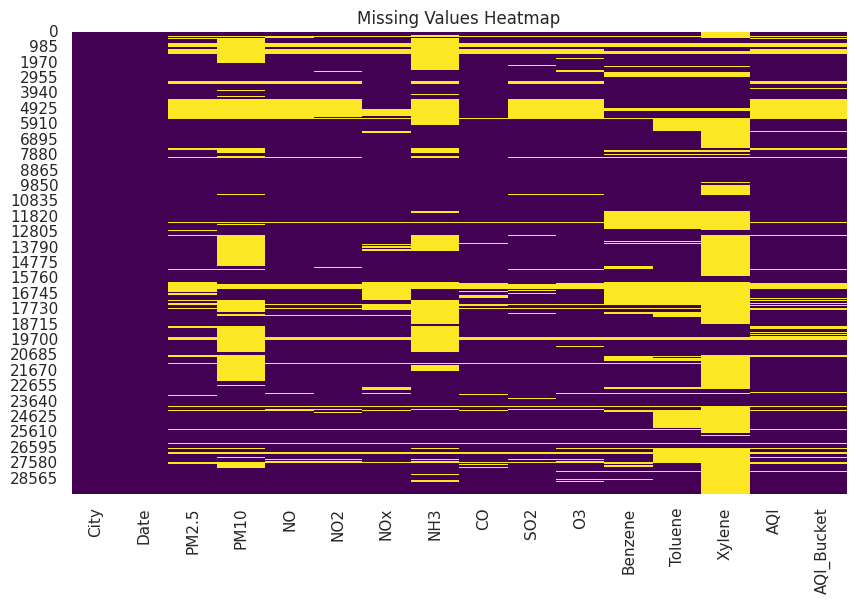

In [372]:
#visualize missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [373]:
# Missing Values Analysis (City-wise)
missing_values = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values

/tmp/ipython-input-1915358518.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



City  Date  PM2.5  PM10    NO   NO2   NOx   NH3   CO  \
City                                                                       
Ahmedabad              0     0    628  1602   609   608   594  2009  609   
Aizawl                 0     0      2     1     0     0     0     0    0   
Amaravati              0     0     59    55    55    55    55    55   97   
Amritsar               0     0    128    63    93    44   289    42   76   
Bengaluru              0     0    146   360     6     6     4   203   11   
Bhopal                 0     0      9     9     9     9     9     9    9   
Brajrajnagar           0     0    185   173   243   234   175   226  150   
Chandigarh             0     0     15     0     4     4     4    10    0   
Chennai                0     0    117  1707    36    36    36   462   25   
Coimbatore             0     0      8     7    55    11     4   123    3   
Delhi                  0     0      2    77     2     2     0     9    0   
Ernakulam              0     0      4     4     4    55     4     4    4   
Gurugram               0     0    154   939   138   136   452  1560  109   
Guwahati               0     0      1     0     1     1     1     1    1   
Hyderabad              0     0    115   355    28    28     7   360    5   
Jaipur                 0     0     12    14    16    14   112    15    7   
Jorapokhar             0     0    790   275   270   270  1169   368  513   
Kochi                  0     0      0     0     2     6     0    16    0   
Kolkata                0     0     55    55    26    25     1     0    0   
Lucknow                0     0    102  2009    24    24   324  1004   28   
Mumbai                 0     0   1225  1246  1242  1253   499  1614   25   
Patna                  0     0    321  1667   203   204   203  1667  151   
Shillong               0     0     64    69    59    59    33    59   33   
Talcher                0     0    184   179   200   222   156   186  148   
Thiruvananthapuram     0     0     42    38    31    31    16   113   16   
Visakhapatnam          0     0    230   236   226   248    38   213   39   

                     SO2    O3  Benzene  Toluene  Xylene   AQI  AQI_Bucket  
City                                                                        
Ahmedabad            640   685      483      483     484   675         675  
Aizawl                 0     9       15       15     113     2           2  
Amaravati             65    55       75       75     269   110         110  
Amritsar             168   115      195      212     213    95          95  
Bengaluru              6   144      266       93    2009    99          99  
Bhopal                 9     9      289      289     289    11          11  
Brajrajnagar         193   203      173      938     938   225         225  
Chandigarh             0     0        0        0       0     5           5  
Chennai               36    49      285      253    2009   125         125  
Coimbatore             3     3        3        3     386    42          42  
Delhi                110    84        0        0     781    10          10  
Ernakulam              4   162        4        4       4     9           9  
Gurugram             175   116      442      610    1560   226         226  
Guwahati               1     1        7      502     502     7           7  
Hyderabad             26    26      127      127     127   126         126  
Jaipur                12    15       22       23    1114    20          20  
Jorapokhar           351   294     1169     1169    1169   398         398  
Kochi                  0     0      162        0     162     4           4  
Kolkata               62    50        1        1     420    60          60  
Lucknow               64    27       99      136    2009   116         116  
Mumbai              1220  1212      210      993     994  1234        1234  
Patna                205   278      172      173     172   399         399  
Shillong              54    56       33    

In [374]:
print("Total missing values in the dataset:", df.isnull().sum().sum())
print("\nMissing values per city:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values in the dataset: 88488

Missing values per city:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-1425039081.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.





# Inference:

The dataset contains a large number of missing values (88,488 in total), confirming that the data is incomplete and requires careful preprocessing.

Missing values are not evenly distributed across cities. Some cities such as Mumbai, Ahmedabad, Jorapokhar, Gurugram, and Lucknow have substantially higher missing counts.

Other cities like Chandigarh, Aizawl, Ernakulam, and Kochi show relatively fewer missing values, indicating more consistent data recording.

The variation suggests differences in monitoring infrastructure, sensor availability, or reporting practices across cities.

# Handling Missing Values:

In [375]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toulene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill()

# Forward Filling Missing Values (`ffill`) for Continuous Pollutant Data

After identifying substantial missing values in several pollutant columns, an additional
step is applied to reduce remaining gaps using **forward fill (ffill)**.  
Forward fill replaces a missing value with the most recent non-missing observation
in the same column.

This method is commonly used in time-series or sequential environmental datasets
because pollutant concentrations often change gradually rather than abruptly.
Therefore, using the last known valid measurement can provide a realistic estimate
for the next missing one.

#### Why Forward Fill Is Applied Here:
- Many pollutants (e.g., PM2.5, NO2, SO2) show temporal continuity.
- Sensors may temporarily fail, so carrying the previous valid reading forward helps
  preserve trends without introducing unrealistic jumps.
- After median and group-wise imputations, a small number of missing values may still
  exist. Forward fill ensures these remaining gaps are fully resolved.
- VOCs and AQI values also benefit from this method where previous known values are
  considered reasonable approximations.




### **Inference**

- Forward fill helps maintain continuity in pollutant measurements and prevents loss
  of important time-dependent information.
- This approach is especially useful when environmental sensors momentarily fail or
  skip readings.
- After applying forward fill, the dataset becomes fully populated, ensuring that
  downstream analysis, visualisation, and machine learning models can operate without
  interruption.
- This step enhances data consistency and is an essential part of the preprocessing
  workflow for real-world air quality datasets.


In [376]:
# Reordering Columns – Dataset Structure Check
#Reordering the columns to place 'datetime' at first position
columns = df.columns.tolist()
columns.insert(0, columns.pop(columns.index('Date')))
df

City        Date  PM2.5   PM10    NO    NO2    NOx   NH3    CO  \
0      Coimbatore  12/06/2019  38.46  43.49  6.68   4.31  10.98  9.32  1.16   
1      Coimbatore  13/06/2019  21.57  27.05  6.57   4.95  11.52  8.80  1.14   
2      Coimbatore  14/06/2019  25.27  32.08  6.86   5.35  12.21  8.21  1.18   
3      Coimbatore  15/06/2019  30.04  35.85  7.37   6.23  13.60  7.35  1.15   
4      Coimbatore  16/06/2019  24.54  31.41  6.23   4.10  10.33  6.65  1.11   
...           ...         ...    ...    ...   ...    ...    ...   ...   ...   
29526   Bengaluru  27/06/2020  16.60  29.48  3.06  13.68  13.07  6.88  0.67   
29527   Bengaluru  28/06/2020  20.44  26.34  2.69  10.33  10.58  6.58  0.66   
29528   Bengaluru  29/06/2020  28.68  29.27  3.62  12.12  12.94  6.80  0.56   
29529   Bengaluru  30/06/2020  14.47  24.26  4.61  12.69  15.00  6.82  0.56   
29530   Bengaluru  01/07/2020  17.50  30.48  3.95  13.25  14.83  7.42  0.54   

         SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  Toulene  
0      10.25  29.80     0.04     0.43     NaN   NaN           NaN     0.43  
1       9.75  25.46     0.04     0.23     NaN  65.0  Satisfactory     0.23  
2      10.92  23.45     0.04     0.31     NaN  66.0  Satisfactory     0.31  
3      10.51  17.24     0.04     0.27     NaN  60.0  Satisfactory     0.27  
4       9.00  22.96     0.02     0.09     NaN  62.0  Satisfactory     0.09  
...      ...    ...      ...      ...     ...   ...           ...      ...  
29526   7.29  15.69     0.21     1.18     0.2  51.0  Satisfactory     1.18  
29527   6.60  17.59     0.12     0.94     0.2  61.0  Satisfactory     0.94  
29528   6.33  16.99     0.17     1.17     0.2  65.0  Satisfactory     1.17  
29529   6.45  16.08     0.18     0.86     0.2  63.0  Satisfactory     0.86  
29530   6.66  15.40     0.27     0.65     0.2  43.0          Good     0.65  

[29531 rows x 17 columns]



# Inference:

The Date column has been successfully moved to the first position, improving readability and making the dataset easier to interpret chronologically.

All pollutant columns remain intact and aligned correctly with their corresponding dates and cities.

The dataset now clearly shows temporal ordering, which is important for time-series analysis, seasonal trends, and hourly aggregation.

The structure confirms that preprocessing steps have not altered the number of rows, maintaining 29,531 observations.

In [377]:



df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['NOx'] = df['NOx'].fillna(df['NOx'].median())

# Remaining pollutants (same style)
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())




df['Benzene'] = df['Benzene'].fillna(df['Benzene'].median())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].median())
df['Xylene'] = df['Xylene'].fillna(df['Xylene'].median())


# AQI (numeric) can also be filled with median
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

# AQI_Bucket (categorical) — simple fill with mode (most common bucket)
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

# Check missing values after cleaning
print("Missing values after cleaning:")
display(df.isnull().sum())


Missing values after cleaning:


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Toulene       0
dtype: int64

While forward filling was explored during EDA to understand temporal continuity, the final modelling dataset uses median imputation only to avoid information leakage across time steps and ensure model robustness

In [378]:
missing_values = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values

/tmp/ipython-input-1183294037.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



City  Date  PM2.5  PM10  NO  NO2  NOx  NH3  CO  SO2  O3  \
City                                                                          
Ahmedabad              0     0      0     0   0    0    0    0   0    0   0   
Aizawl                 0     0      0     0   0    0    0    0   0    0   0   
Amaravati              0     0      0     0   0    0    0    0   0    0   0   
Amritsar               0     0      0     0   0    0    0    0   0    0   0   
Bengaluru              0     0      0     0   0    0    0    0   0    0   0   
Bhopal                 0     0      0     0   0    0    0    0   0    0   0   
Brajrajnagar           0     0      0     0   0    0    0    0   0    0   0   
Chandigarh             0     0      0     0   0    0    0    0   0    0   0   
Chennai                0     0      0     0   0    0    0    0   0    0   0   
Coimbatore             0     0      0     0   0    0    0    0   0    0   0   
Delhi                  0     0      0     0   0    0    0    0   0    0   0   
Ernakulam              0     0      0     0   0    0    0    0   0    0   0   
Gurugram               0     0      0     0   0    0    0    0   0    0   0   
Guwahati               0     0      0     0   0    0    0    0   0    0   0   
Hyderabad              0     0      0     0   0    0    0    0   0    0   0   
Jaipur                 0     0      0     0   0    0    0    0   0    0   0   
Jorapokhar             0     0      0     0   0    0    0    0   0    0   0   
Kochi                  0     0      0     0   0    0    0    0   0    0   0   
Kolkata                0     0      0     0   0    0    0    0   0    0   0   
Lucknow                0     0      0     0   0    0    0    0   0    0   0   
Mumbai                 0     0      0     0   0    0    0    0   0    0   0   
Patna                  0     0      0     0   0    0    0    0   0    0   0   
Shillong               0     0      0     0   0    0    0    0   0    0   0   
Talcher                0     0      0     0   0    0    0    0   0    0   0   
Thiruvananthapuram     0     0      0     0   0    0    0    0   0    0   0   
Visakhapatnam          0     0      0     0   0    0    0    0   0    0   0   

                    Benzene  Toluene  Xylene  AQI  AQI_Bucket  Toulene  
City                                                                    
Ahmedabad                 0        0       0    0           0        0  
Aizawl                    0        0       0    0           0        0  
Amaravati                 0        0       0    0           0        0  
Amritsar                  0        0       0    0           0        0  
Bengaluru                 0        0       0    0           0        0  
Bhopal                    0        0       0    0           0        0  
Brajrajnagar              0        0       0    0           0        0  
Chandigarh                0        0       0    0           0        0  
Chennai                   0        0       0    0           0        0  
Coimbatore                0        0       0    0           0        0  
Delhi                     0        0       0    0           0        0  
Ernakulam                 0        0       0    0           0        0  
Gurugram                  0        0       0    0           0        0  
Guwahati                  0        0       0    0           0        0  
Hyderabad                 0        0       0    0           0        0  
Jaipur                    0        0       0    0           0        0  
Jorapokhar                0        0       0    0           0        0  
Kochi                     0        0       0    0           0        0  
Kolkata                   0        0       0    0           0        0  
Lucknow                   0        0       0    0           0        0  
Mumbai                    0        0       0    0           0        0  
Patna                     0        0       0    0           0        0  
Shillong                  0        0       0    0      

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

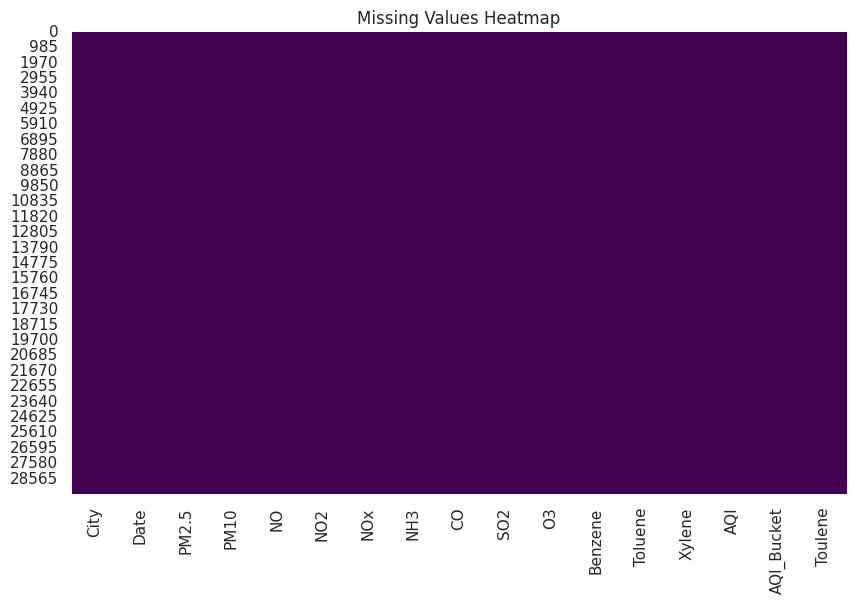

In [380]:
#visualize missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**BASIC SUMMARY**



In [381]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nStatistical Summary:")
display(df.describe())

Dataset Shape: (29531, 17)

Column Names:
 Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Toulene'],
      dtype='object')

Statistical Summary:


PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      64.619175    105.862372     16.955068     27.399848     32.885649   
std       64.916610     82.252731     23.410073     23.532994     33.697919   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       25.005000     57.820000      5.220000     11.650000     13.700000   
50%       45.290000     78.600000      9.330000     21.360000     22.250000   
75%       78.620000    139.540000     18.690000     35.030000     38.665000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      20.733626      2.292738     15.507891     33.314607      3.332226   
std       26.659301      6.824267     20.663451     21.934858     15.967856   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        5.200000      0.500000      5.270000     17.050000      0.130000   
50%       11.880000      0.910000      8.950000     29.390000      1.310000   
75%       27.510000      1.490000     15.840000     44.215000      2.830000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI       Toulene  
count  29531.000000  29531.000000  29531.000000  29531.000000  
mean       7.140485      2.129446    162.387593      8.332526  
std       17.224737      5.256434    138.904674     18.004360  
min        0.000000      0.000000     13.000000      0.000000  
25%        1.280000      0.180000     76.000000      0.500000  
50%        2.970000      0.460000    114.000000      2.730000  
75%        6.020000      2.140000    205.000000     10.250000  
max      454.850000    170.370000   2049.000000    454.850000

In [382]:
# Converting Date column into a proper datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(['City','Date'])
# Creating simple time-based columns (like the example)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Display first 5 rows to verify new features while keeping all pollutants unchanged
df[['Date', 'Year', 'Month', 'Day'] +[ 'PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].head()


Date    Year  Month  Day   PM2.5   PM10     NO    NO2    NOx   NH3  \
386 2015-01-01  2015.0    1.0  1.0   14.21  15.69   0.92  18.22  17.15  1.72   
417 2015-01-02  2015.0    1.0  2.0  135.99  15.69  43.48  42.08  84.57  1.72   
445 2015-01-03  2015.0    1.0  3.0   61.12  15.69   3.58  16.81  20.92  1.72   
476 2015-01-04  2015.0    1.0  4.0   96.04  15.69   3.80  20.07  23.46  1.72   
506 2015-01-05  2015.0    1.0  5.0   96.65  15.69   4.67  15.90  20.53  1.72   

        CO    SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
386   0.92  27.64  133.36     0.00     0.02    0.00   33.0       Good  
417  43.48  75.23  102.70     0.40     0.04   25.87  782.0     Severe  
445   3.58  28.44   30.48     2.69     1.58    1.32  292.0       Poor  
476   3.80  62.42   46.61     7.54    13.44    1.65  324.0  Very Poor  
506   4.67  39.41   11.83     0.01     0.00    3.11  240.0       Poor

# Understanding Column Names and Statistical Summary

The dataset contains a wide range of features representing different types of air
pollutants, meteorological information, and time-based variables. The column list
confirms that all major pollutant categories are present, including particulate
matter (PM2.5, PM10), nitrogen-based pollutants (NO, NO2, NOx), gaseous pollutants
(CO, SO2, O3), and volatile organic compounds (Benzene, Toluene, Xylene). Additional
columns such as `AQI` and `AQI_Bucket` provide an overall measure of air quality.

The statistical summary offers a deeper understanding of the distribution of each
numerical variable:

#### Key Observations:
- **PM2.5 and PM10 have high mean values (63.7 and 90.2 respectively)**, indicating
  generally poor air quality conditions across the dataset.
- The **minimum values for most pollutants are close to 0**, which is expected on days
  or locations with minimal emissions.
- The **maximum values are extremely high**, such as PM2.5 reaching nearly 950 and PM10
  reaching 1000, suggesting severe pollution episodes.
- Nitrogen pollutants (NO, NO2, NOx) exhibit moderate mean levels but also show wide
  variation, implying fluctuations likely due to traffic patterns and industrial activity.
- VOCs (Benzene, Toluene, Xylene) have relatively low averages, but their maximum
  values indicate occasional spikes that may be associated with industrial releases.
- The **AQI ranges from 13 to over 2000**, showing that the dataset includes both
  low-pollution and highly hazardous air quality days.
- The summary shows consistent year, month, and day values, confirming that the date
  parsing and extraction of temporal features were performed correctly.

---

###Inference

- The dataset exhibits **high variability across pollutants**, indicating that air
  quality conditions change significantly over time and between locations.
- The very high maximum values for PM2.5, PM10, and AQI suggest **frequent extreme
  pollution events**, which are important to capture in both EDA and modelling.
- The wide standard deviations show that pollutant levels are **not uniformly
  distributed**, which implies the data is influenced by strong seasonal, geographical,
  and environmental factors.
- VOCs have **lower average values** but show sudden spikes, meaning they may still
  contribute meaningfully to poor air quality on select days.
- The statistical summary confirms that the dataset is **rich, diverse, and suitable
  for detailed EDA**, allowing exploration of pollution patterns, city-wise trends,
  and seasonal behaviour.

This inference helps justify the need for further exploratory plots and predictive
modelling to understand pollution dynamics more deeply.


# **TASK DATA VISUALIZATION**


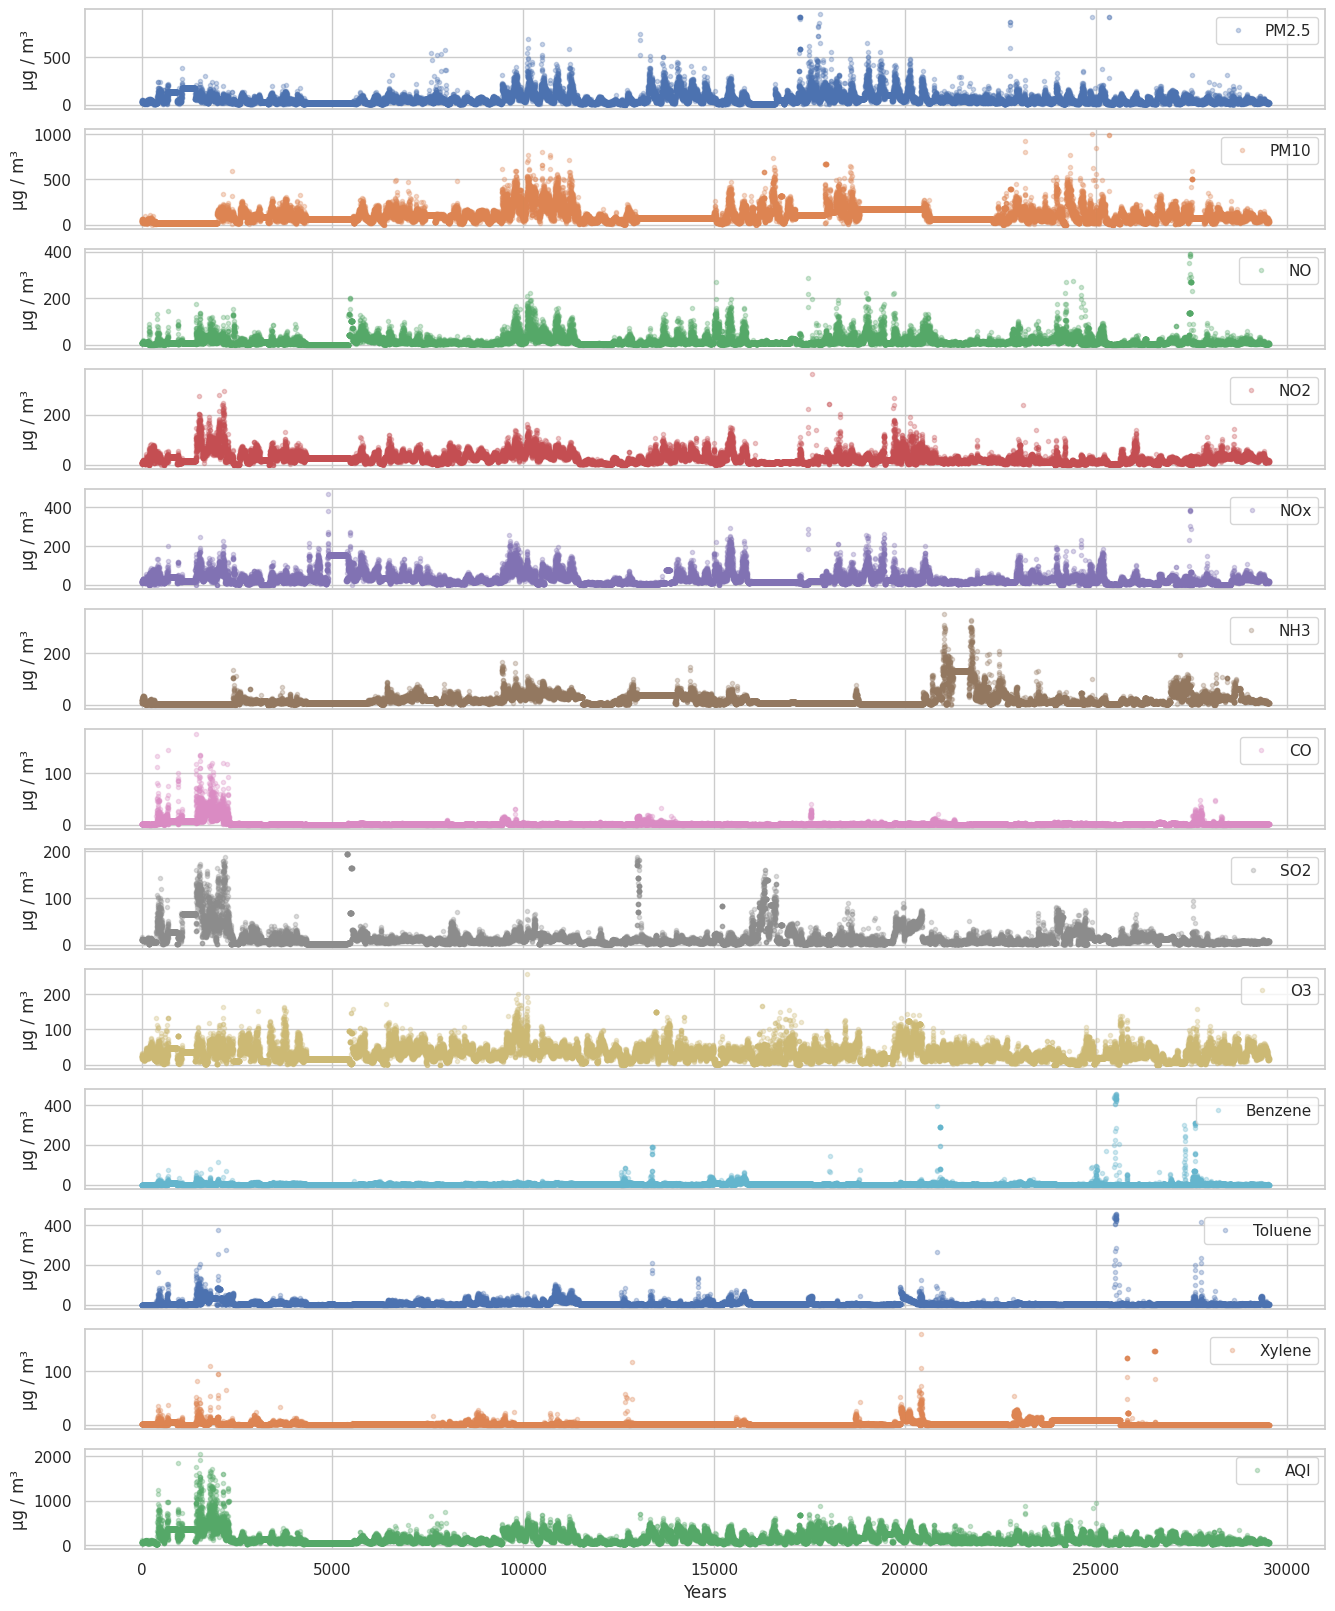

In [383]:
# Plot of dataset after handling missing values
#Time-Series Analysis of Pollutant Concentrations
pollutants = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene', 'AQI'
]

# df.set_index('Date', inplace=True)

axes = df[pollutants].plot(
    marker='.', alpha=0.3, linestyle='None',
    figsize=(16, 20), subplots=True
)


for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('µg / m³')

plt.show()

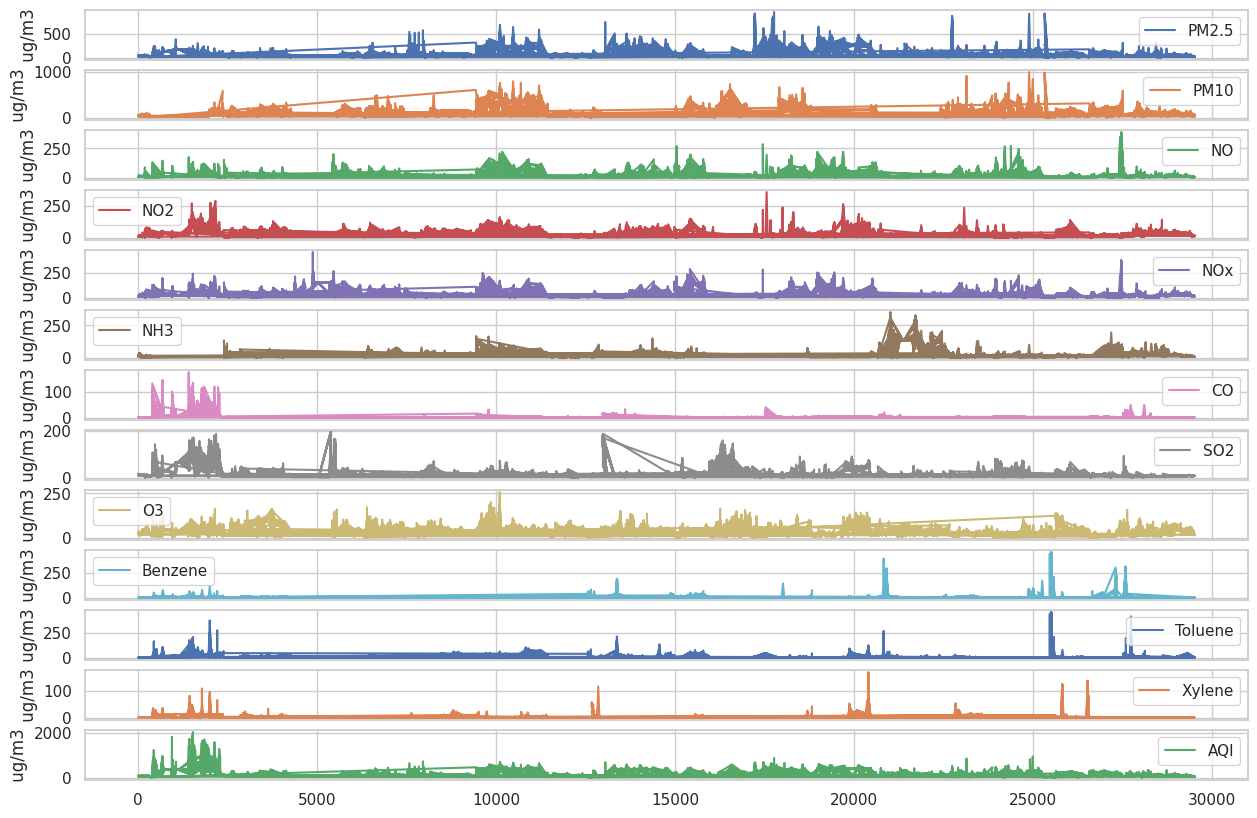

In [384]:
pollutants = [   'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene', 'AQI']
axes= df[pollutants].plot(figsize=(15, 10), subplots=True)
for ax in axes:
    ax.set_ylabel(' ug/m3 ')
plt.show()



## Inference:

The time-series plots show strong fluctuations in pollutant levels over time, indicating that air quality is highly variable rather than stable.

**PM2.5 and PM10** exhibit frequent spikes, suggesting repeated high-pollution episodes, likely linked to seasonal effects, traffic, and industrial activity.

**Nitrogen-based pollutants** (NO, NO2, NOx) show similar patterns, reflecting their common origin from combustion sources such as vehicles.

**NH3, SO2, and CO** generally remain at lower levels but display occasional sharp peaks, indicating episodic emissions.

**VOCs (Benzene, Toluene, Xylene**) show mostly low background values with sudden spikes, suggesting intermittent industrial or fuel-related releases.

The AQI time-series closely follows PM2.5 and PM10 trends, confirming that particulate matter is a major driver of overall air quality.

# **Average Pollution Levels by Station and Pollutant**

In [385]:
#creating stacked bar chart to compare average pollution levels across stations
# Average Pollution Levels by Station and Pollutant
stations_stats = df.groupby('City')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']].mean().reset_index()
import plotly.express as px

stations_stats_melted = pd.melt(stations_stats,
                                id_vars=['City'],
                                value_vars=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene', 'AQI'],
                                var_name='Pollutant',
                                value_name='Average Concentration')
fig = px.bar(stations_stats_melted, x='City',y='Average Concentration', color='Pollutant',title='Average Pollution Levels by Station and Pollutant',labels={'City': 'Station', 'Average Concentration': 'Average Concentration (ug/m3)'}, barmode='stack')
fig.show()



The stacked bar chart provides a comparative overview of average pollutant
concentrations across different monitoring stations. Each bar represents a city,
and the coloured segments show the contribution of individual pollutants.

## Key Observations:

- **Delhi, Ghaziabad, Lucknow, and Patna show the highest overall pollution levels**,
  with significantly taller stacked bars compared to other cities. This aligns with
  known air quality issues in these regions, often driven by traffic emissions,
  industrial activity, and seasonal biomass burning.

- **PM10 and PM2.5 contribute the largest portions of total pollution** in almost all
  stations. Their large stack segments reinforce the role of particulate matter as
  the dominant pollutant driving poor air quality across Indian cities.

- **NO, NO2, and NOx levels are notably higher in major metropolitan areas** such as
  Delhi, Hyderabad, and Bengaluru, likely due to dense traffic and combustion sources.

- **VOC pollutants (Benzene, Toluene, Xylene)** appear in smaller quantities but show
  elevated levels in industrial or transportation-heavy regions, indicating
  contributions from fuel emissions and chemical industries.

- Cities with comparatively **lower pollution levels**, such as Shillong, Kochi, and
  Thiruvananthapuram, show consistently smaller bar heights across all pollutants.

##  Inference:

- The visualization highlights large **inter-city variations**, confirming that
  pollution patterns are strongly dependent on geographical, industrial, and traffic
  factors.

- The dominance of **PM10 and PM2.5** indicates that particulate matter should remain
  a primary focus for pollution control strategies.

- The presence of multiple pollutants in high concentrations in certain cities
  suggests complex pollution sources, requiring multi-pronged mitigation efforts.

Overall, this plot helps identify **which cities experience the highest pollution
burden** and **which pollutants contribute most significantly**, guiding both
policy-making and further detailed analysis.


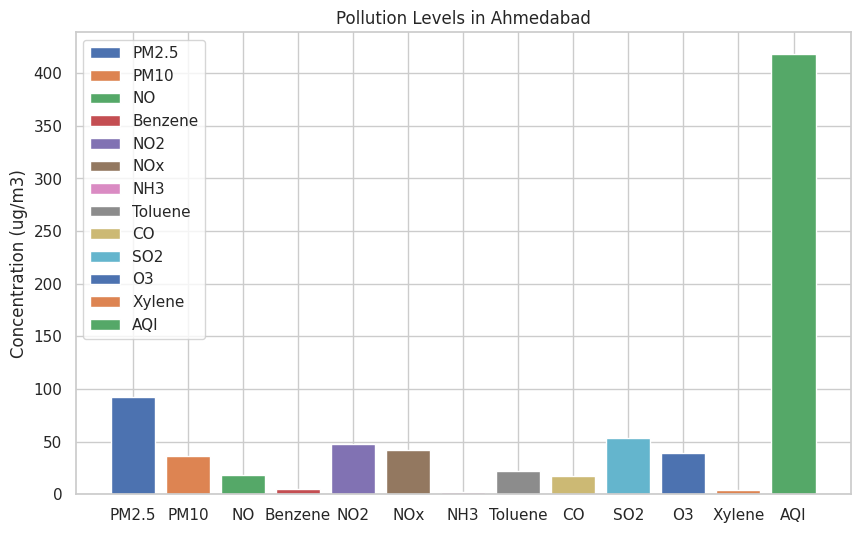

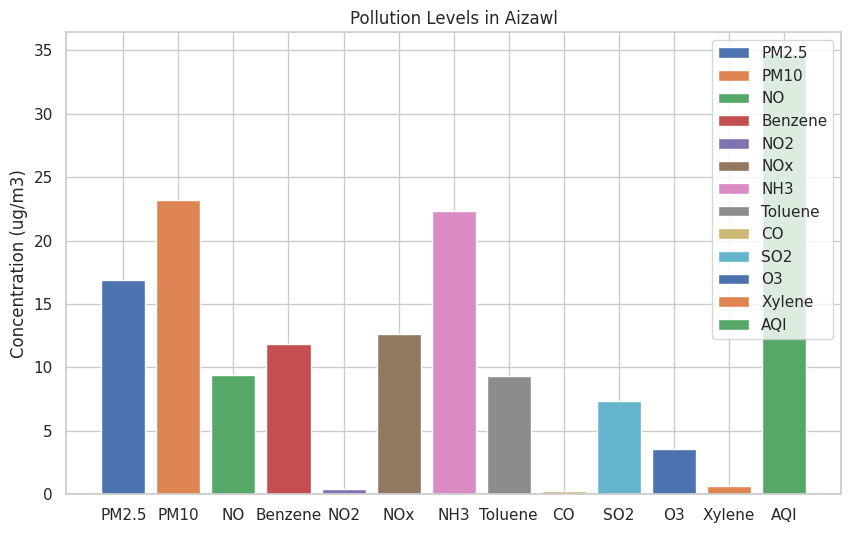

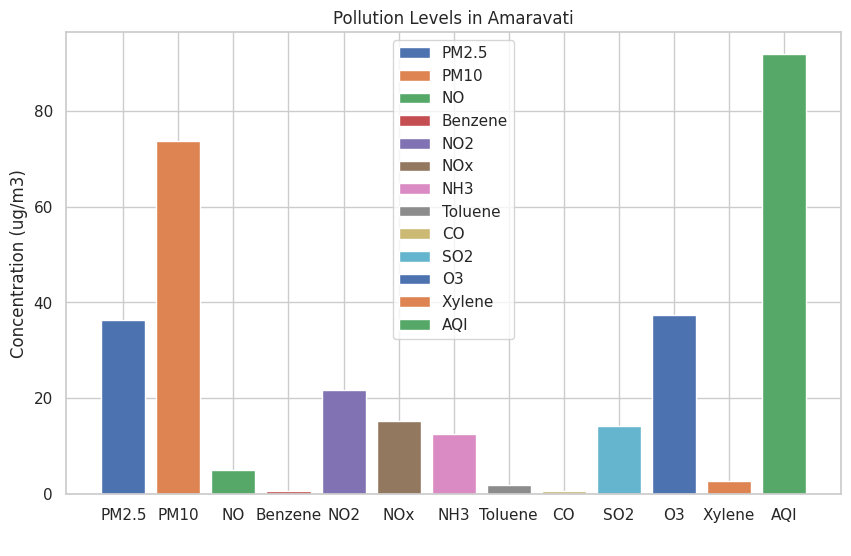

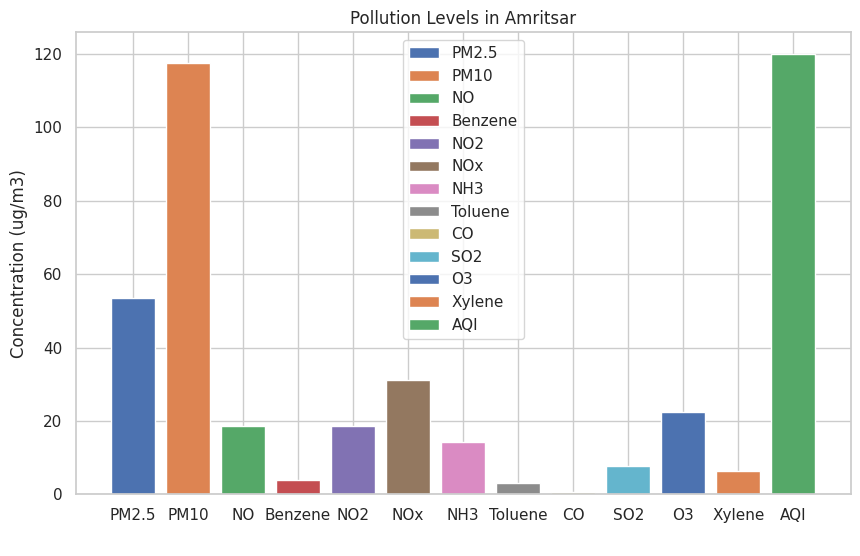

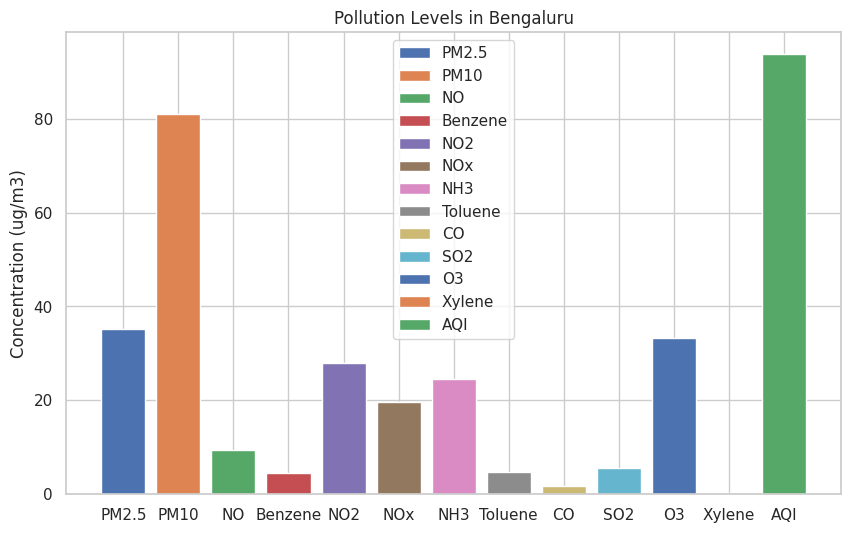

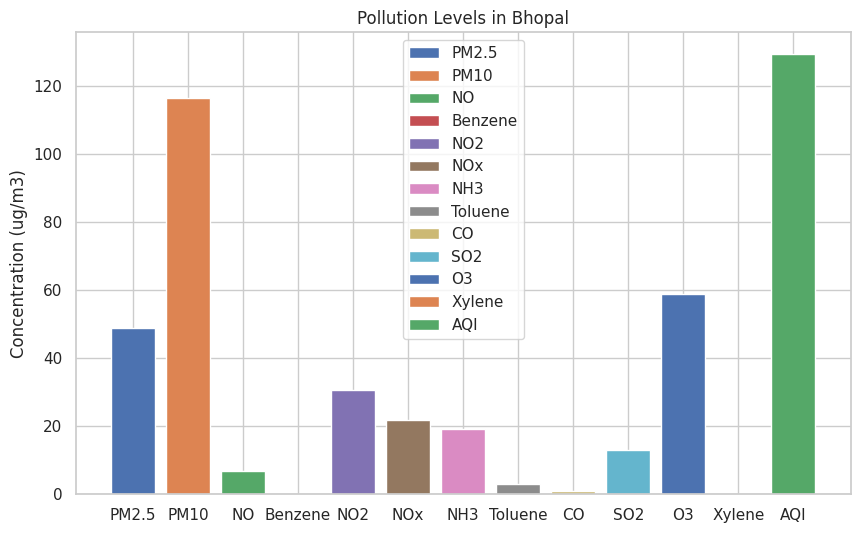

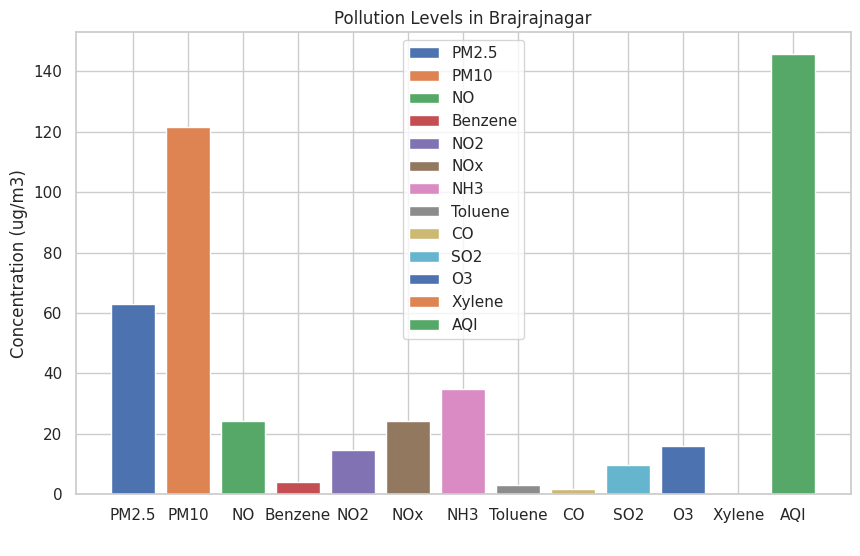

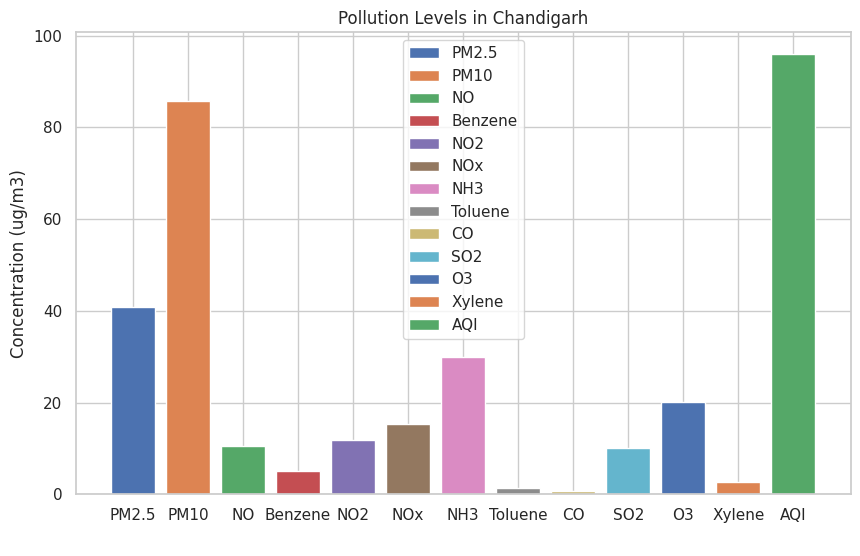

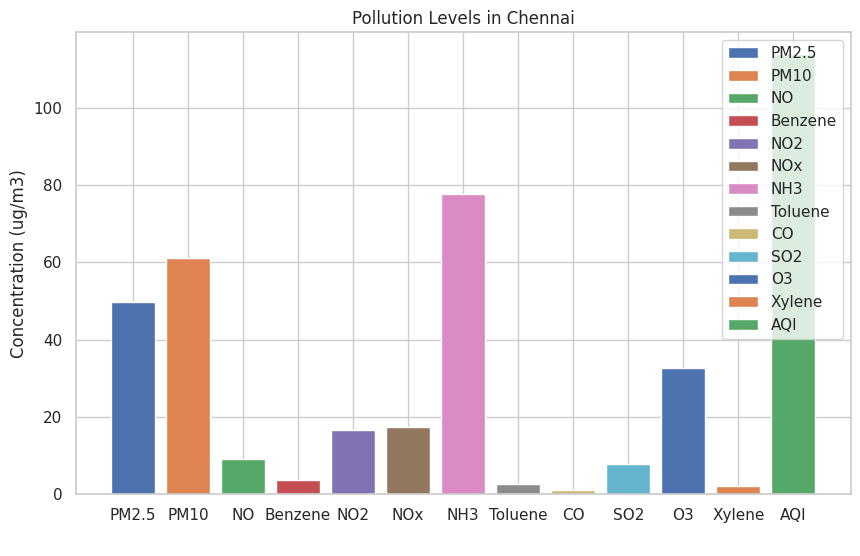

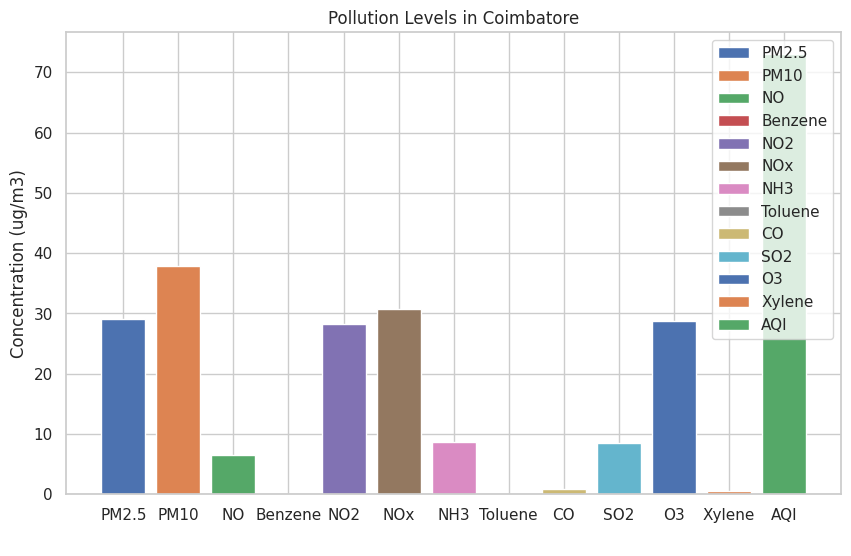

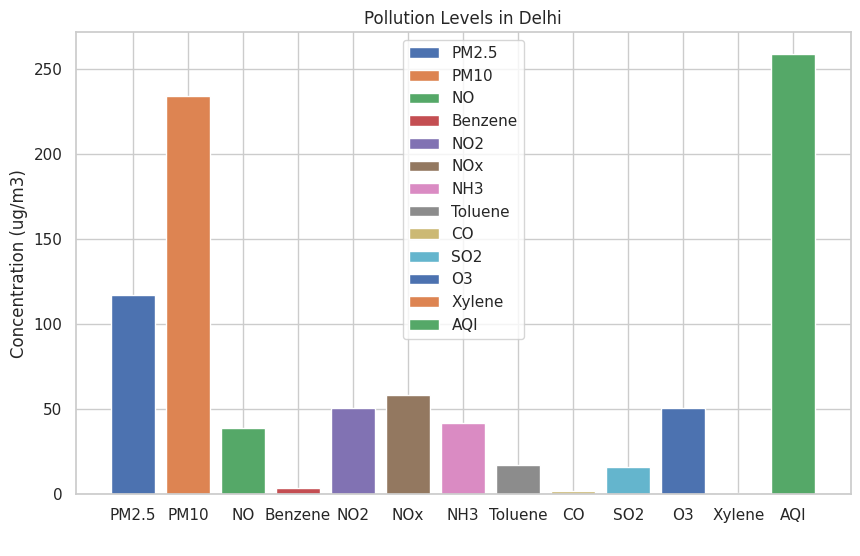

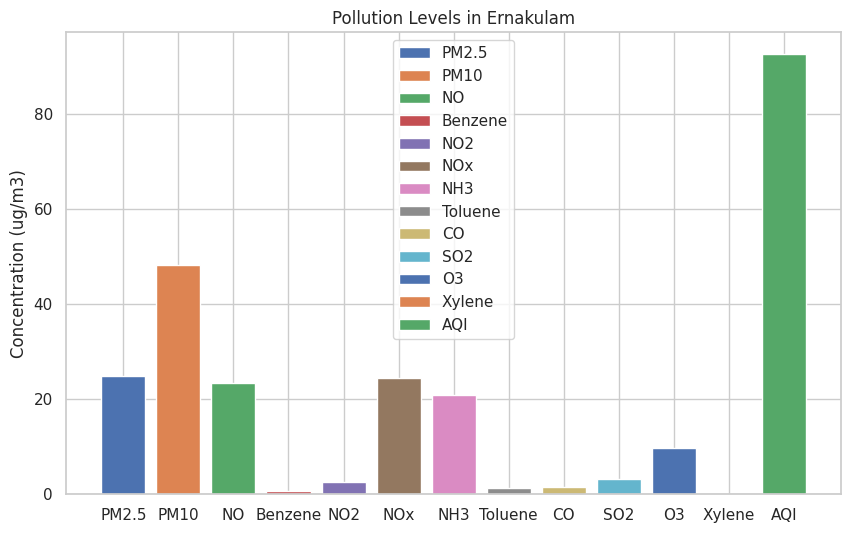

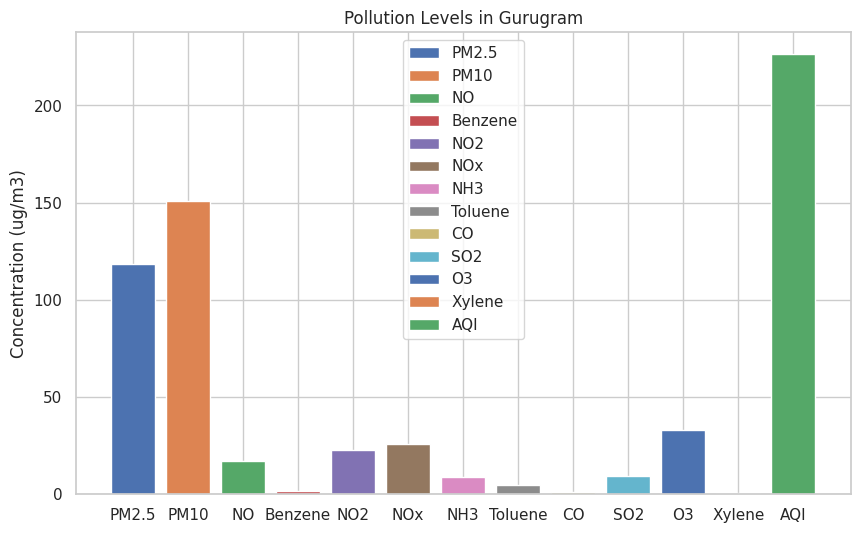

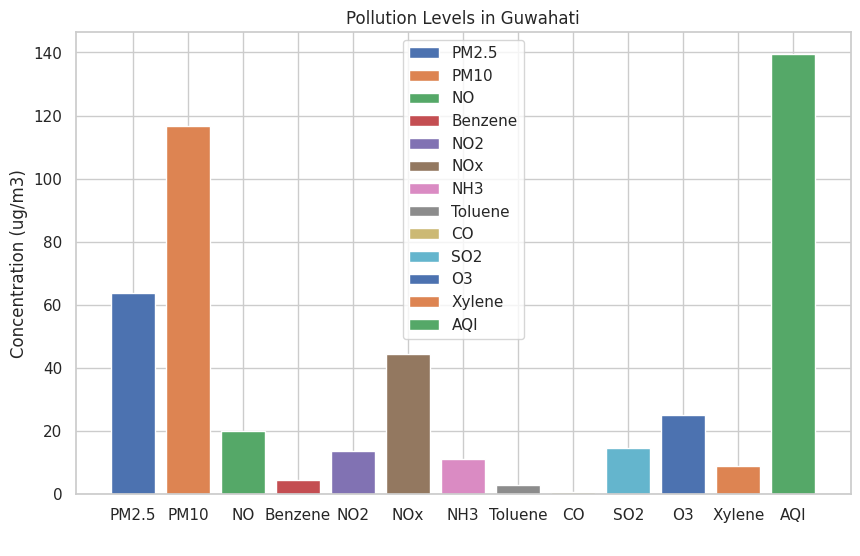

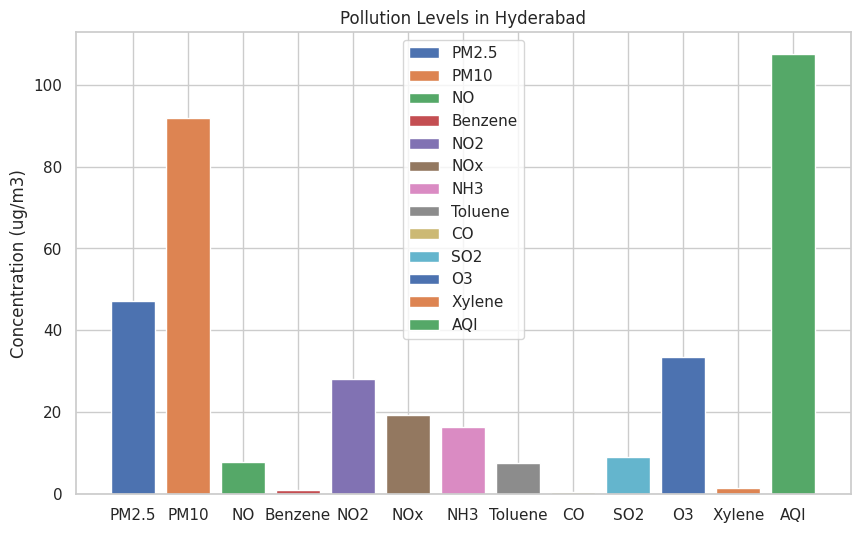

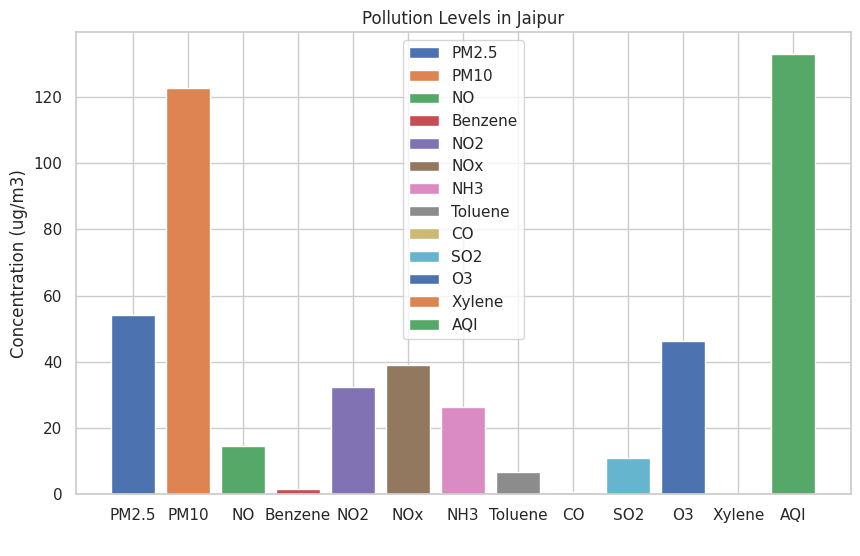

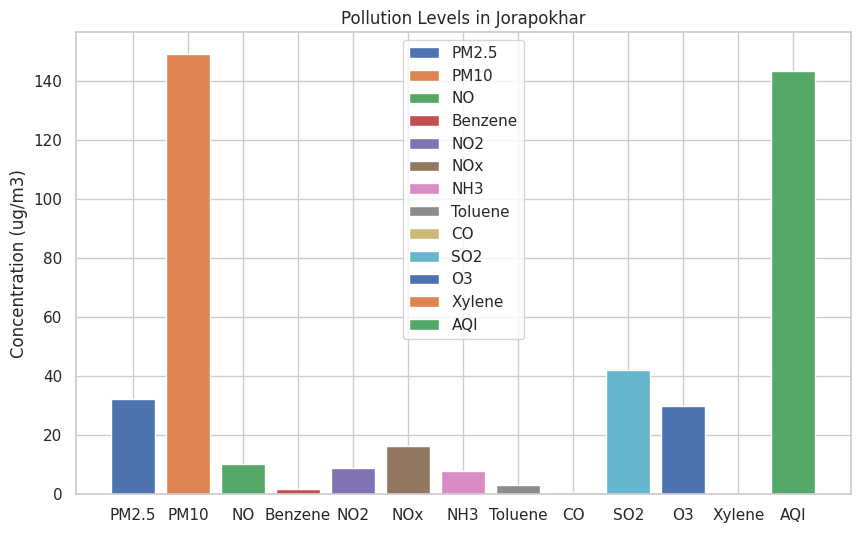

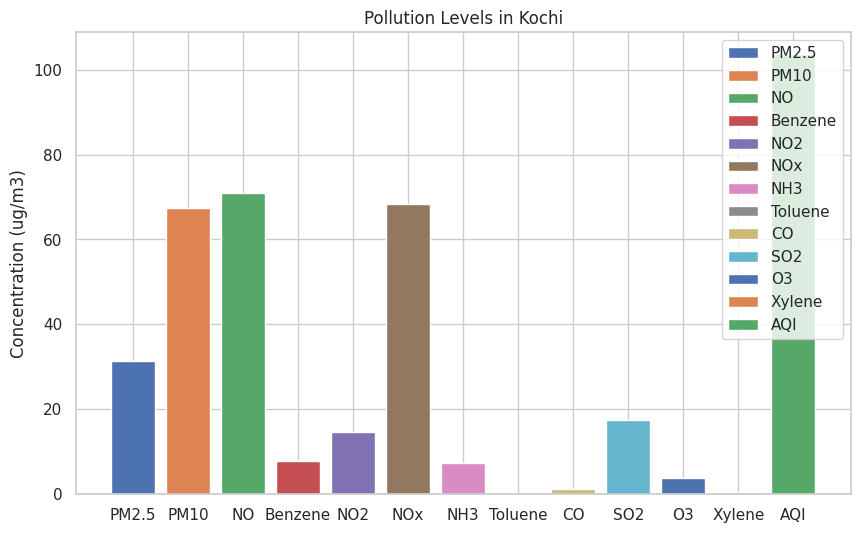

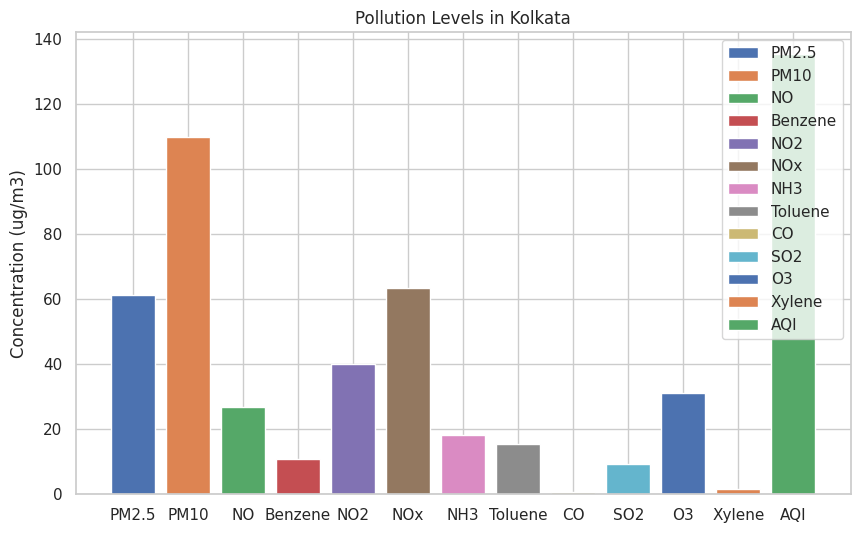

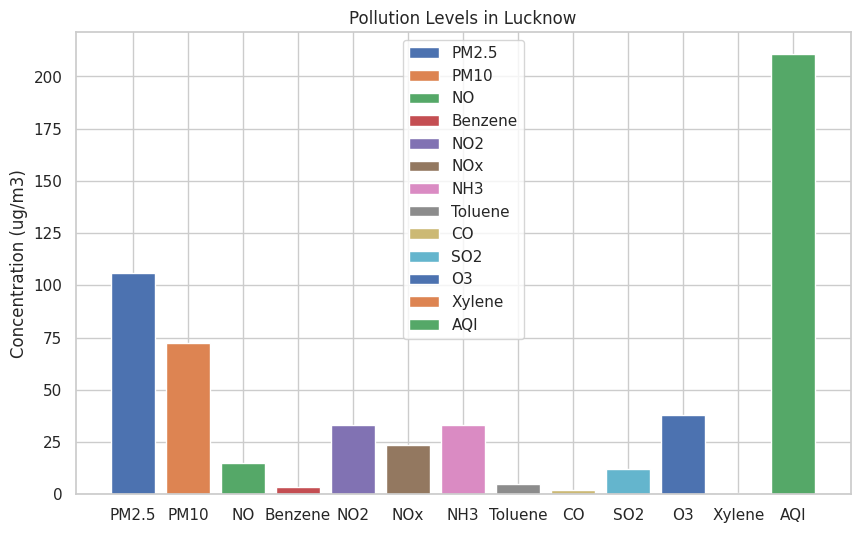

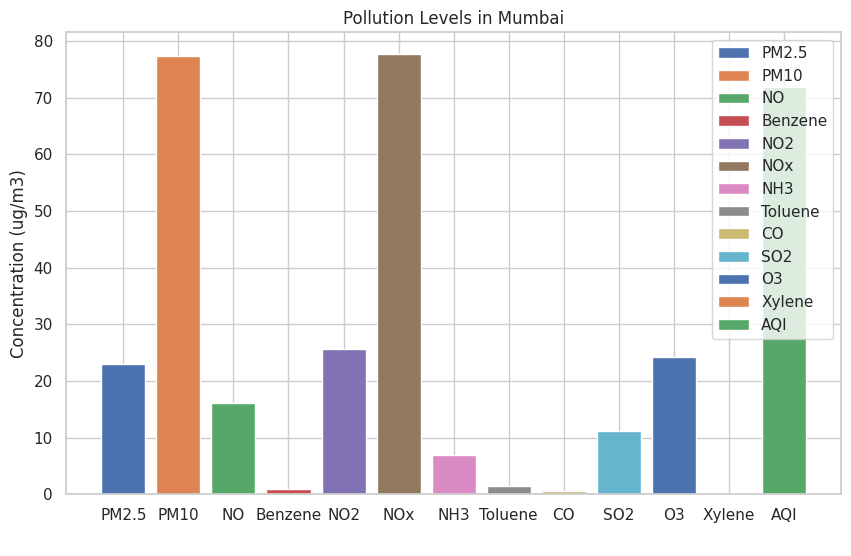

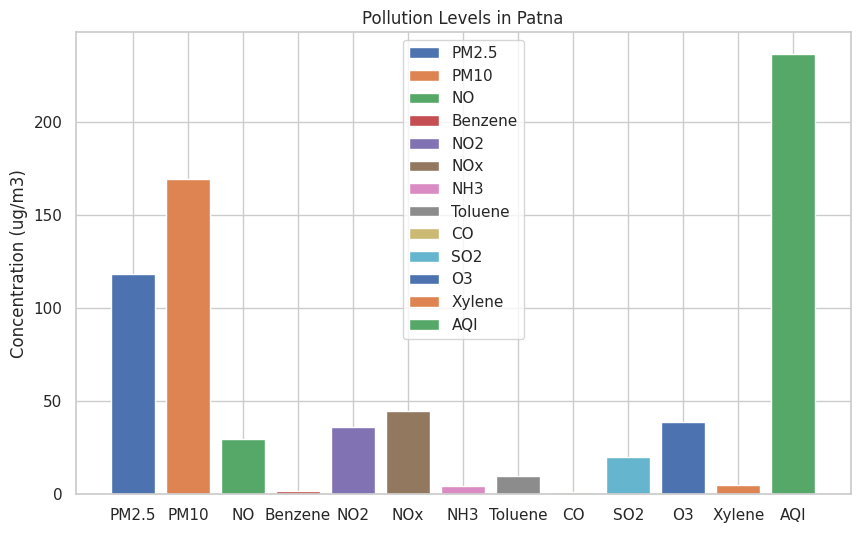

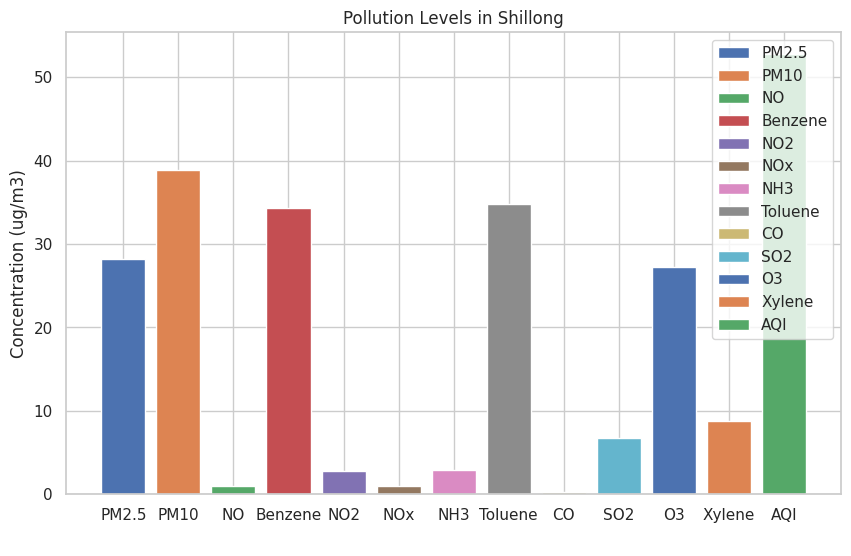

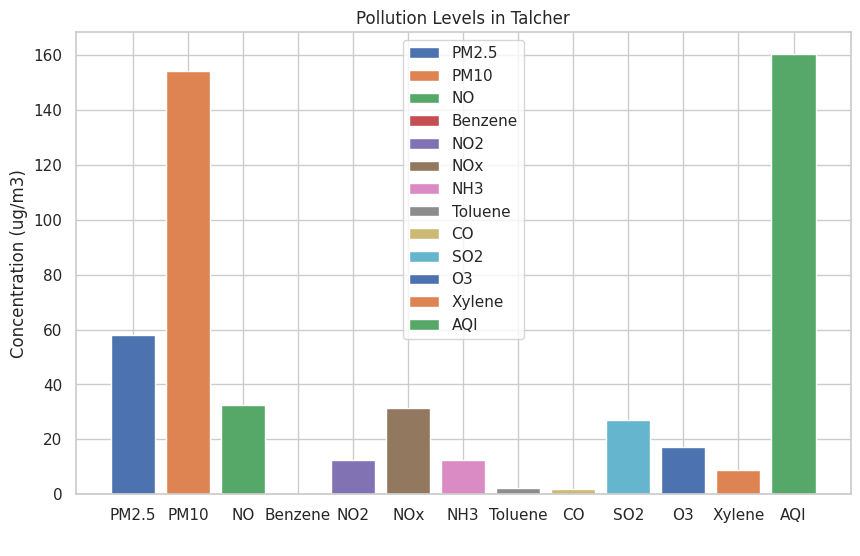

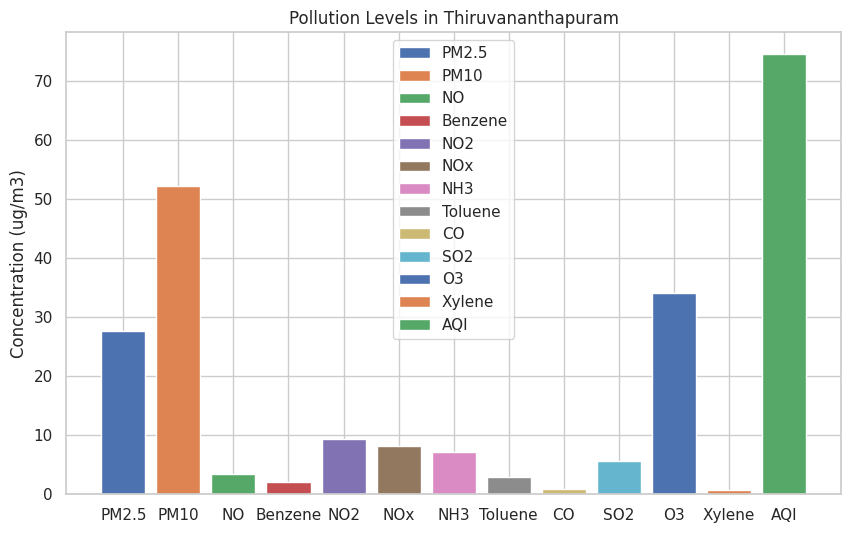

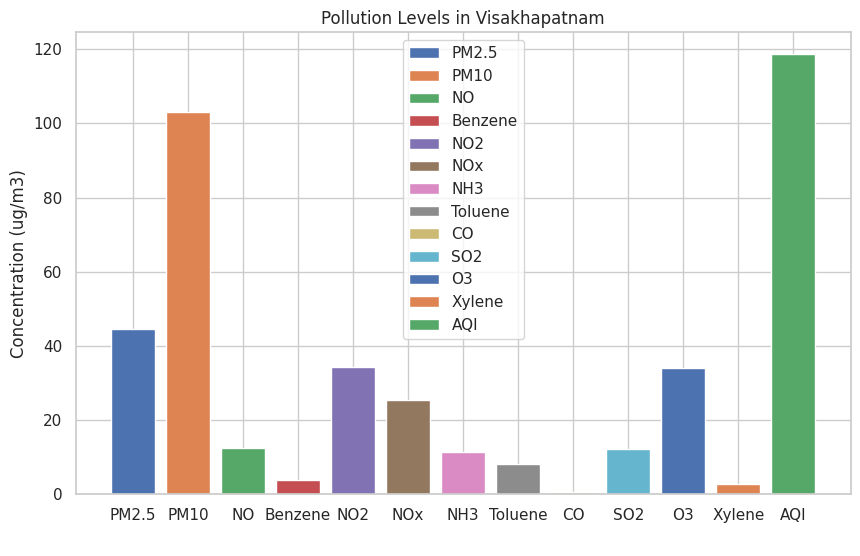

In [386]:
import matplotlib.pyplot as plt
stations = df['City'].unique()
pollutants = ['PM2.5', 'PM10', 'NO','Benzene', 'NO2', 'NOx','NH3','Toluene', 'CO', 'SO2', 'O3', 'Xylene', 'AQI']
for station in stations:
    station_data = df[df['City'] == station]
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, station_data[pollutant].mean(), label=pollutant)
    plt.title(f'Pollution Levels in {station}')
    plt.xlabel(' ')
    plt.ylabel('Concentration (ug/m3)')
    plt.legend()
    plt.show()

In [387]:
def max_polluted_city(selected_pollutants):

  x1 = df.groupby('City')[selected_pollutants].mean().sort_values(ascending=False).head(6).reset_index()

  return x1.style.background_gradient(cmap='Blues')

In [388]:
from IPython.display import display_html
#Maximum Polluted City by Pollutant
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df._repr_html_()
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

pm2_5 = max_polluted_city( 'PM2.5')
pm10 = max_polluted_city( 'PM10')
no = max_polluted_city( 'NO')
no2 = max_polluted_city( 'NO2')
nox = max_polluted_city( 'NOx')
nh3 = max_polluted_city( 'NH3')
co = max_polluted_city( 'CO')
so2 = max_polluted_city( 'SO2')
o3 = max_polluted_city( 'O3')
benzene = max_polluted_city( 'Benzene')
toluene = max_polluted_city( 'Toluene')
xylene = max_polluted_city( 'Xylene')
aqi = max_polluted_city( 'AQI')
display_side_by_side(pm2_5, pm10, no, no2, nox, nh3, co,so2, o3,  benzene, toluene, xylene, aqi)

City 
 PM2.5 
 
 
 
 
 0 
 Gurugram 
 118.230339 
 
 
 1 
 Patna 
 118.169386 
 
 
 2 
 Delhi 
 117.101215 
 
 
 3 
 Lucknow 
 105.919348 
 
 
 4 
 Ahmedabad 
 92.186889 
 
 
 5 
 Guwahati 
 63.860478 
 
 
 

 
 
 
   
 City 
 PM10 
 
 
 
 
 0 
 Delhi 
 233.949716 
 
 
 1 
 Patna 
 169.214327 
 
 
 2 
 Talcher 
 154.056054 
 
 
 3 
 Gurugram 
 150.686236 
 
 
 4 
 Jorapokhar 
 149.144739 
 
 
 5 
 Jaipur 
 122.679129 
 
 
 

 
 
 
   
 City 
 NO 
 
 
 
 
 0 
 Kochi 
 70.900247 
 
 
 1 
 Delhi 
 38.971533 
 
 
 2 
 Talcher 
 32.519914 
 
 
 3 
 Patna 
 29.574424 
 
 
 4 
 Kolkata 
 26.712641 
 
 
 5 
 Brajrajnagar 
 24.158753 
 
 
 

 
 
 
   
 City 
 NO2 
 
 
 
 
 0 
 Delhi 
 50.769856 
 
 
 1 
 Ahmedabad 
 47.434689 
 
 
 2 
 Kolkata 
 40.120958 
 
 
 3 
 Patna 
 36.033703 
 
 
 4 
 Visakhapatnam 
 34.210834 
 
 
 5 
 Lucknow 
 33.195256 
 
 
 

 
 
 
   
 City 
 NOx 
 
 
 
 
 0 
 Mumbai 
 77.661473 
 
 
 1 
 Kochi 
 68.412901 
 
 
 2 
 Kolkata 
 63.304939 
 
 
 3 
 Delhi 
 58.567023 
 
 
 4 
 Patna 
 44.754785 
 
 
 5 
 Guwahati 
 44.331135 
 
 
 

 
 
 
   
 City 
 NH3 
 
 
 
 
 0 
 Chennai 
 77.720363 
 
 
 1 
 Delhi 
 41.957636 
 
 
 2 
 Brajrajnagar 
 34.797804 
 
 
 3 
 Lucknow 
 32.912663 
 
 
 4 
 Chandigarh 
 29.993224 
 
 
 5 
 Jaipur 
 26.406194 
 
 
 

 
 
 
   
 City 
 CO 
 
 
 
 
 0 
 Ahmedabad 
 17.782997 
 
 
 1 
 Lucknow 
 2.126904 
 
 
 2 
 Delhi 
 1.976053 
 
 
 3 
 Talcher 
 1.909243 
 
 
 4 
 Bengaluru 
 1.841095 
 
 
 5 
 Brajrajnagar 
 1.732186 
 
 
 

 
 
 
   
 City 
 SO2 
 
 
 
 
 0 
 Ahmedabad 
 53.282220 
 
 
 1 
 Jorapokhar 
 42.126467 
 
 
 2 
 Talcher 
 27.066076 
 
 
 3 
 Patna 
 20.247788 
 
 
 4 
 Kochi 
 17.595988 
 
 
 5 
 Delhi 
 16.026446 
 
 
 

 
 
 
   
 City 
 O3 
 
 
 
 
 0 
 Bhopal 
 59.011730 
 
 
 1 
 Delhi 
 50.816546 
 
 
 2 
 Jaipur 
 46.359937 
 
 
 3 
 Ahmedabad 
 38.936984 
 
 
 4 
 Patna 
 38.871668 
 
 
 5 
 Lucknow 
 37.717332 
 
 
 

 
 
 
   
 City 
 Benzene 
 
 
 
 
 0 
 Shillong 
 34.373129 
 
 
 1 
 Aizawl 
 11.849115 
 
 
 2 
 Kolkata 
 10.866032 
 
 
 3 
 Kochi 
 7.790000 
 
 
 4 
 Ahmedabad 
 5.325326 
 
 
 5 
 Chandigarh 
 5.065724 
 
 
 

 
 
 
   
 City 
 Toluene 
 
 
 
 
 0 
 Shillong 
 34.744194 
 
 
 1 
 Ahmedabad 
 21.785241 
 
 
 2 
 Delhi 
 17.185042 
 
 
 3 
 Kolkata 
 15.379939 
 
 
 4 
 Patna 
 9.681830 
 
 
 5 
 Aizawl 
 9.281327 
 
 
 

 
 
 
   
 City 
 Xylene 
 
 
 
 
 0 
 Talcher 
 8.820000 
 
 
 1 
 Guwahati 
 8.820000 
 
 
 2 
 Shillong 
 8.820000 
 
 
 3 
 Amritsar 
 6.393964 
 
 
 4 
 Patna 
 4.903832 
 
 
 5 
 Ahmedabad 
 3.832494 
 
 
 

 
 
 
   
 City 
 AQI 
 
 
 
 
 0 
 Ahmedabad 
 418.030861 
 
 
 1 
 Delhi 
 258.632653 
 
 
 2 
 Patna 
 236.139397 
 
 
 3 
 Gurugram 
 226.335319 
 
 
 4 
 Lucknow 
 210.623693 
 
 
 5 
 Talcher 
 160.312432



##Inference:

The tables identify the most polluted city for each pollutant, highlighting that different pollutants peak in different locations.

- **Delhi, Ahmedabad, and Gurugram** appear repeatedly across multiple pollutants, indicating persistent and multi-source pollution.

- **Particulate matter (PM2.5 and PM10)** reaches its highest levels in highly urbanised and industrial regions, reinforcing their role as major air quality drivers.

- **Nitrogen pollutants (NO, NO2, NOx)** peak primarily in large metropolitan cities, reflecting strong traffic and combustion-related emissions.

- **VOCs (Benzene, Toluene, Xylene)** show peak values in specific cities, suggesting localized industrial or fuel-related pollution sources.

-  **AQI**  highest values are concentrated in a small number of cities, confirming that extreme air quality events are geographically clustered rather than evenly distributed.

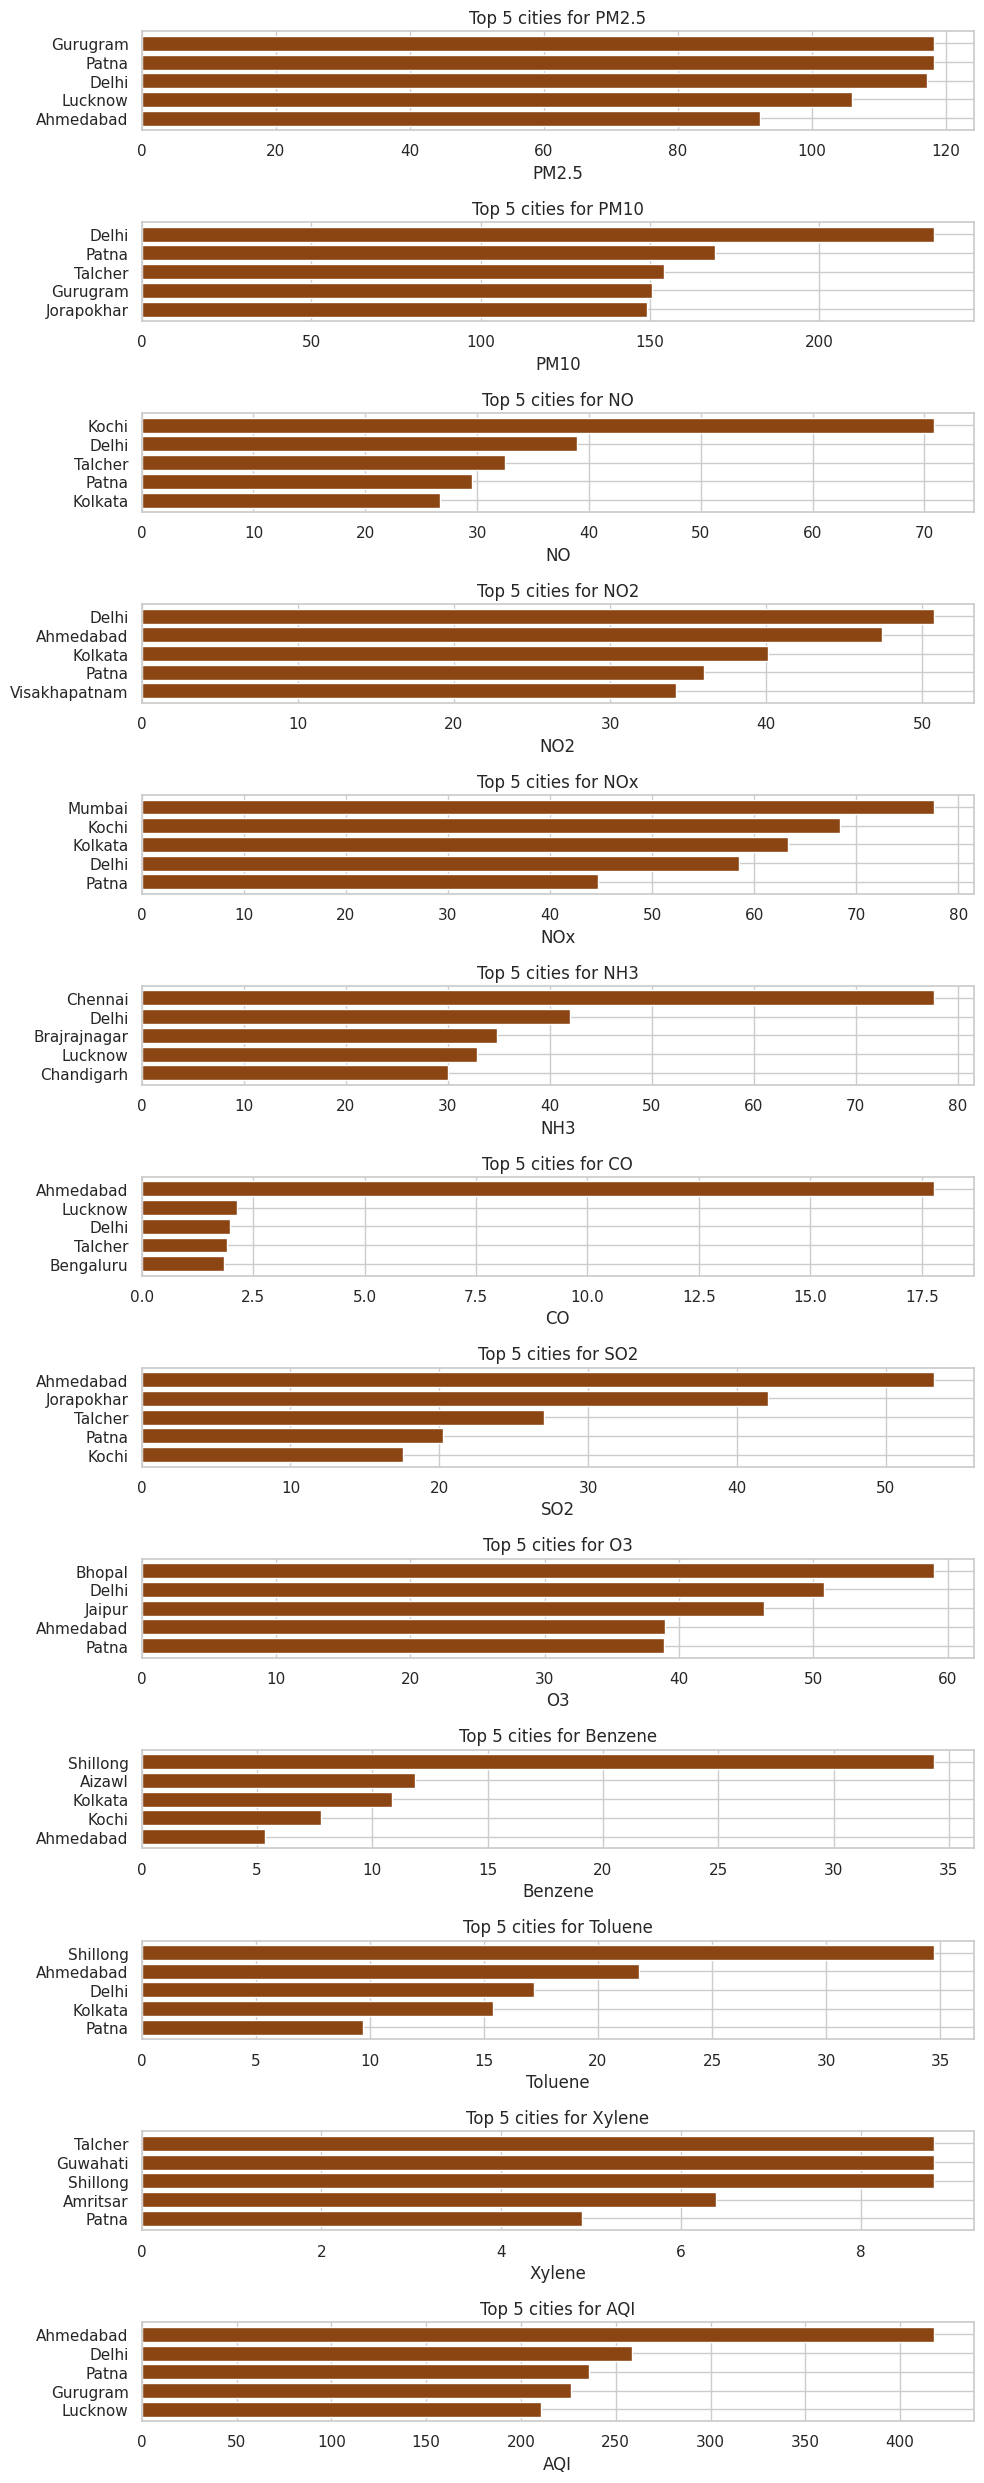

In [389]:
#Top 5 Most Polluted Cities by Pollutant
import pandas as pd
import matplotlib.pyplot as plt


pollutants_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']
mean_pollutant_by_city = df.groupby('City')[pollutants_columns].mean()

# Store both the city name and its value
top_cities_data = {}
for pollutant in pollutants_columns:
    top_cities_data[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(5)


fig, axes = plt.subplots(len(pollutants_columns),1, figsize=(10, 25))

for i, pollutant in enumerate(pollutants_columns):
    axes[i].barh(top_cities_data[pollutant].index, top_cities_data[pollutant].values, color='saddlebrown')
    axes[i].set_title(f'Top 5 cities for {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()



##Inference:

The bar charts highlight that different pollutants peak in different cities, confirming that air pollution sources vary geographically.

- **PM2.5 and PM10** are highest in cities such as Gurugram, Delhi, Patna, and Lucknow, indicating severe particulate pollution in densely populated and traffic-heavy regions.

- **Nitrogen-based pollutants (NO, NO2, NOx)** show high concentrations in major urban and industrial cities, reflecting strong vehicle and combustion-related emissions.

- **NH3** levels are notably high in cities like Chennai and Brajrajnagar, suggesting contributions from agricultural or industrial activities.

- **CO and SO2** peak in a smaller number of cities, indicating more localized emission sources such as industrial processes or fuel combustion.

- **Ozone (O3)** shows elevated levels in cities such as Bhopal and Delhi, consistent with its formation as a secondary pollutant through photochemical reactions.

- **VOCs (Benzene, Toluene, Xylene)** are highest in specific cities (e.g., Shillong, Gurugram, Amritsar), suggesting localized industrial or fuel-related pollution.

- **AQI** chart confirms that Ahmedabad, Delhi, Patna, and Gurugram experience the poorest overall air quality.

# **Creating a Bar Chart to visualize the average of each Pollutant:**

In [390]:
#create bar chart for average of each pollutant
#Average Pollution Levels by Pollutant
import plotly.express as px

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene']
average_pollutants = df[pollutants].mean()
fig = px.bar(
    x=pollutants,
    y=average_pollutants,
    labels={'x': 'Pollutant', 'y': 'Average Concentration'},
    title='Average Pollution Levels by Pollutant',color_discrete_sequence=['saddlebrown']
)
fig.show()



#Inference:
- The bar chart shows that **PM10 and PM2.5 have the highest average concentrations**, indicating that particulate matter is the dominant contributor to air pollution.
- **Nitrogen-based pollutants (NO, NO2, NOx)** show moderate average levels, reflecting consistent emissions from traffic and combustion sources.
- **Ozone (O3)** has a relatively high average compared to other gaseous pollutants, highlighting its importance as a secondary pollutant.
- **CO, Benzene, Toluene, and Xylene** have lower average concentrations, but their presence still contributes to overall air quality degradation.



# **Creating Pie Chart**






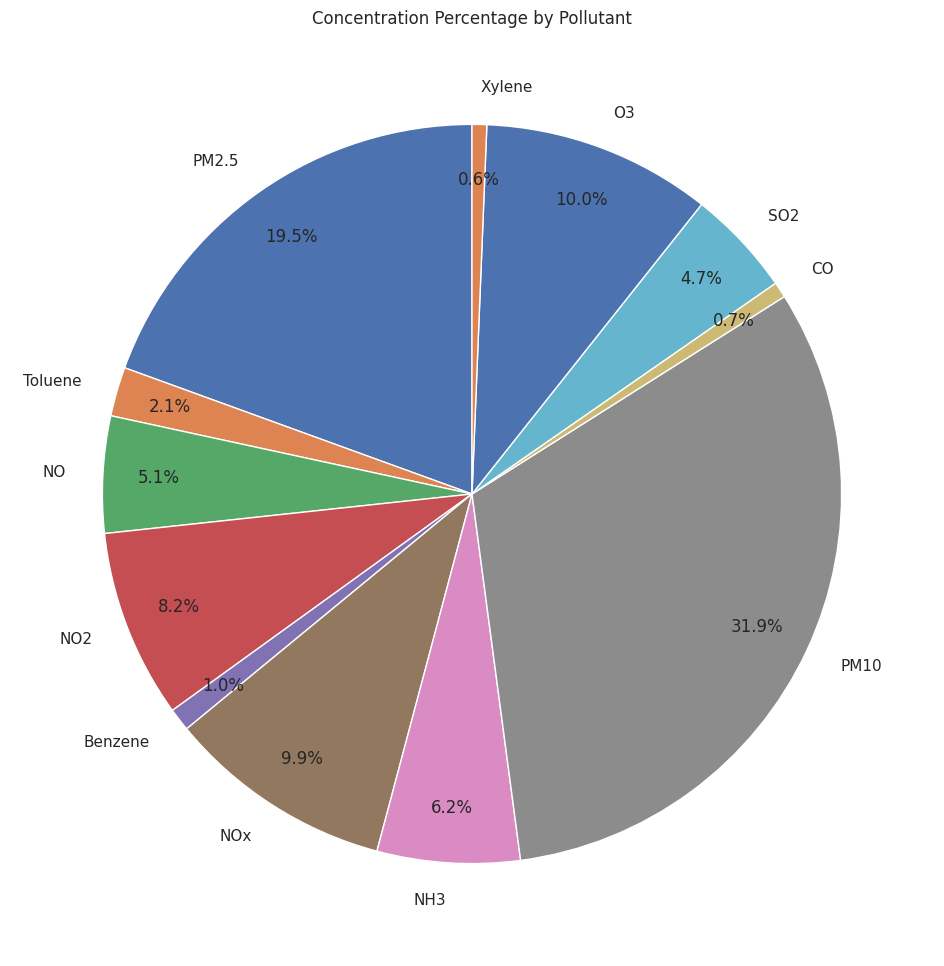

In [391]:
#creating pie chart
import matplotlib.pyplot as plt

pollutants = ['PM2.5', 'Toluene',  'NO', 'NO2', 'Benzene','NOx','NH3', 'PM10','CO', 'SO2', 'O3', 'Xylene']
total_pollutant_concentration = df[pollutants].sum().sum()

# Corrected: Calculate concentration_percentage as a single Series
concentration_percentage = (df[pollutants].sum() / total_pollutant_concentration) * 100

plt.figure(figsize=(12, 12))
plt.pie(concentration_percentage, labels=pollutants, autopct='%1.1f%%', startangle=90, pctdistance=0.85,labeldistance=1.1 )
plt.title('Concentration Percentage by Pollutant')
plt.show()



#Inference:

The pie chart shows that PM10 contributes the largest proportion of total pollution (≈28.6%), making it the most dominant pollutant in the dataset.

- **PM2.5** is the second-largest contributor (≈20.2%), further highlighting the major role of particulate matter in air quality degradation.

- **Nitrogen oxides** (NOx, NO2, NO) together account for a significant share of total pollution, reflecting strong combustion and traffic-related emissions.

- **Ozone** (O3) represents a noticeable proportion, indicating the importance of secondary pollutant formation.

- **NH3 and SO2** contribute moderate shares, likely linked to agricultural and industrial activities.

- **VOCs**(Benzene, Toluene, Xylene) account for a relatively small percentage overall, but their presence is still important due to their toxic nature.

# **Visualizing Each Feature To See The Distribution Using Subplot**

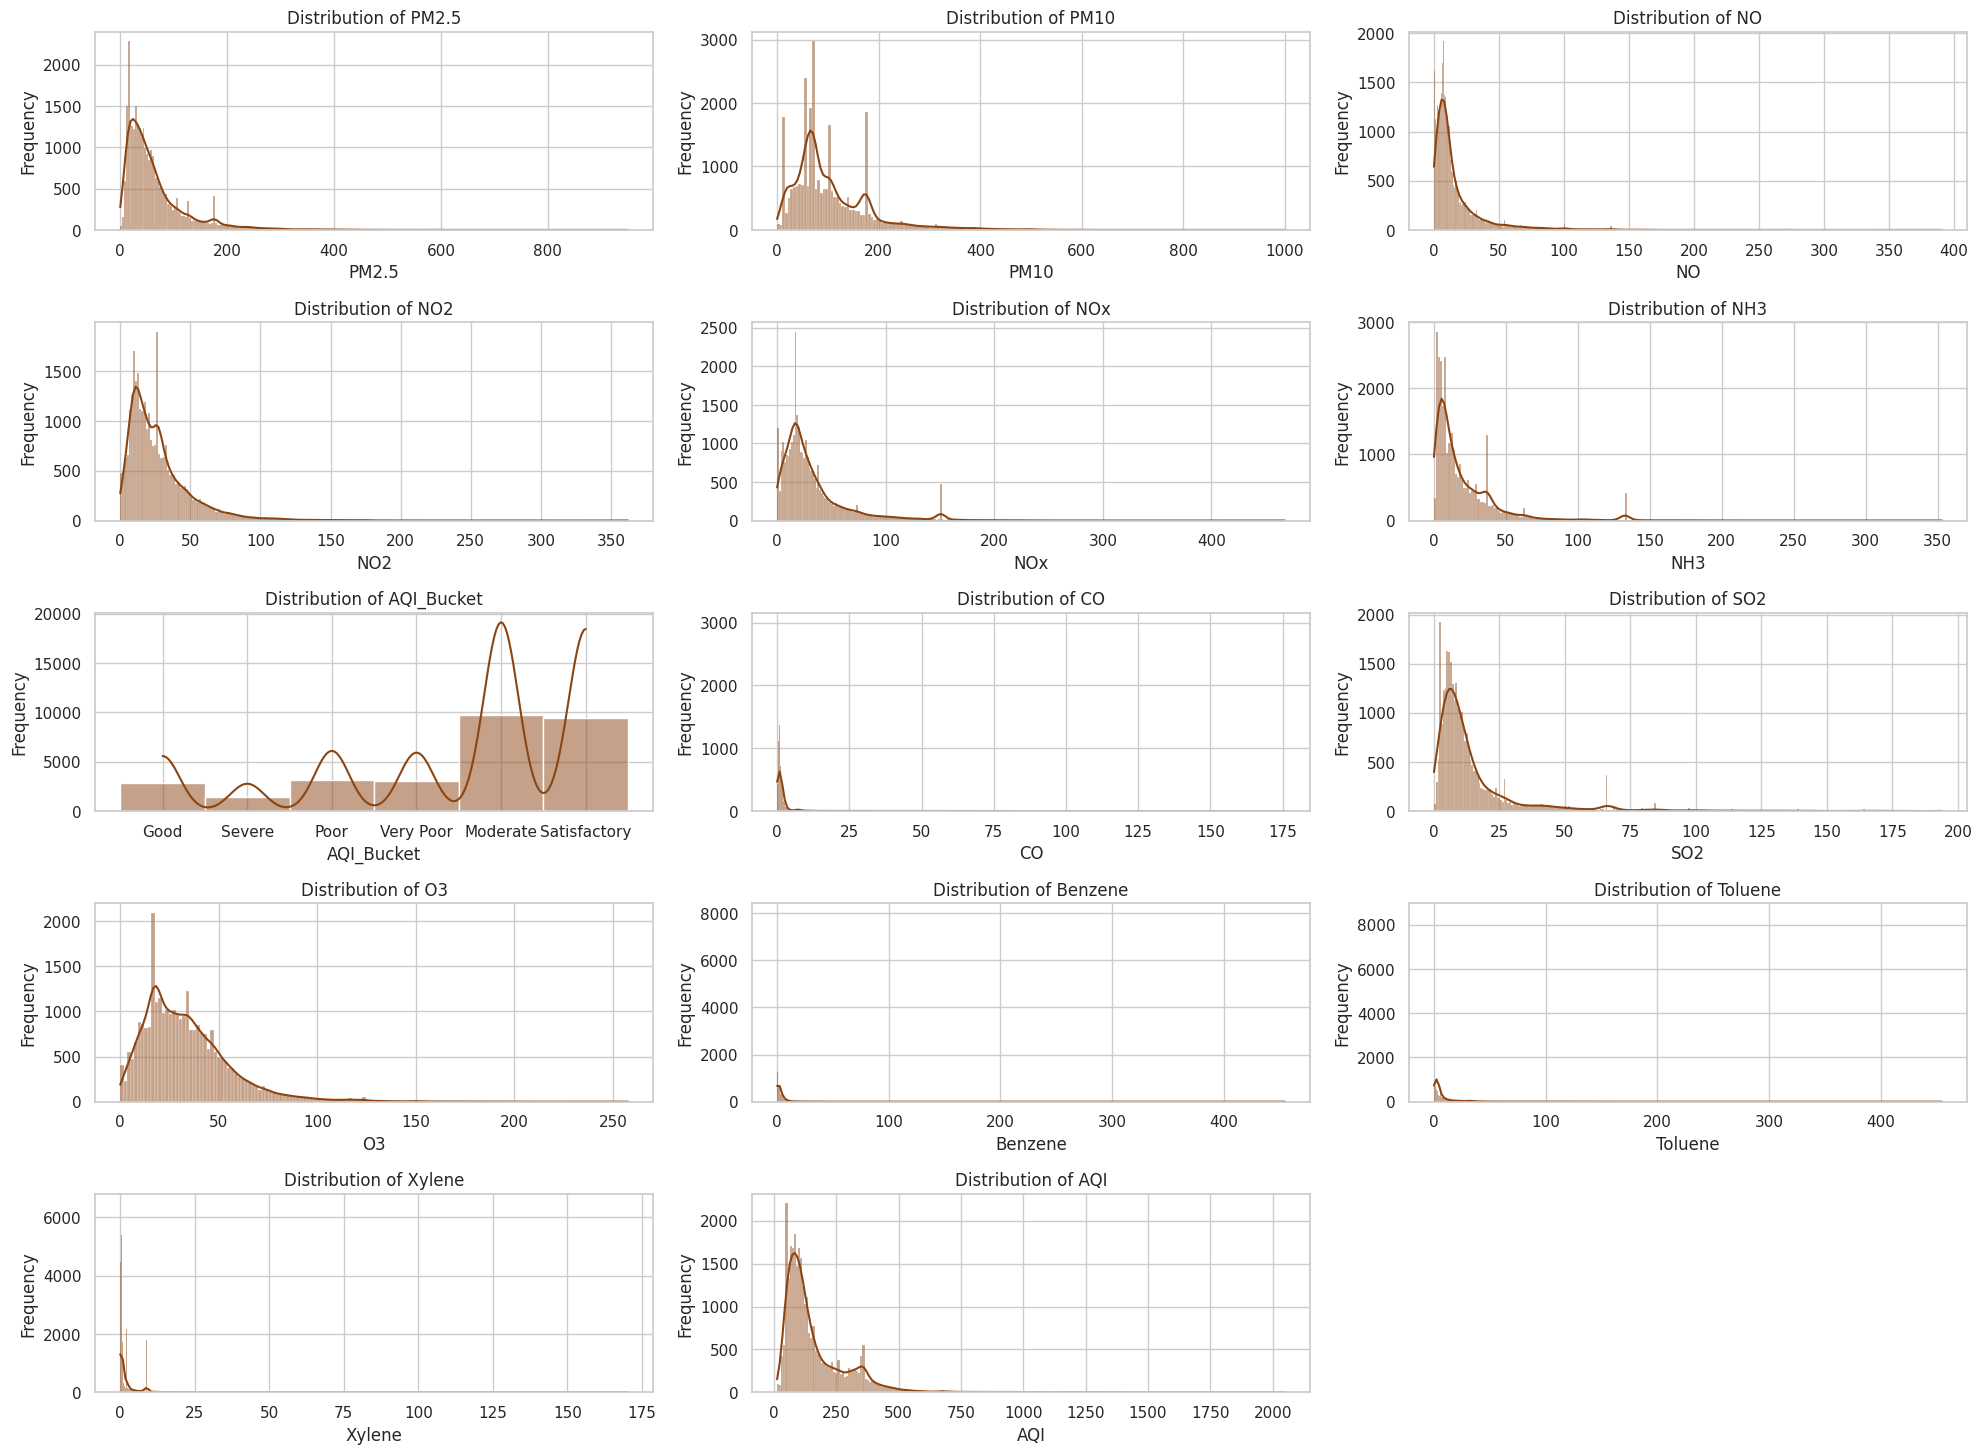

In [392]:
#visualizing each feature to see the distribution using subplot
#Distribution Analysis of Key Air Quality Variables

key_variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3','AQI_Bucket', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']

plt.figure(figsize=(20, 20))
for i, column in enumerate(key_variables, 1):
    # Adjusted subplot grid (7, 3) to accommodate all 13 plots
    plt.subplot(7, 3, i)
    sns.histplot(df[column], kde=True ,color='saddlebrown')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


#Inference:

Most pollutant distributions are positively (right) skewed, meaning low-to-moderate values occur frequently, while very high pollution levels occur less often.

- **PM2.5 and PM10** show long right tails, indicating the presence of extreme pollution episodes, even though typical daily levels are lower.

- **Nitrogen-based pollutants** (NO, NO2, NOx) follow similar skewed patterns, reflecting variability in traffic and combustion-related emissions.

- **NH3, SO2, and CO** generally remain at low concentrations but exhibit occasional sharp spikes, suggesting episodic industrial or agricultural emissions.

- **Ozone** (O3) shows a smoother distribution compared to primary pollutants, consistent with its formation as a secondary pollutant.

- **VOCs** (Benzene, Toluene, Xylene) have highly concentrated values near zero with rare extreme spikes, indicating localized emission sources.

- The **AQI distribution** mirrors PM2.5 and PM10 behaviour, confirming that particulate matter strongly influences overall air quality categories.

- The **AQI_Bucket distribution** shows that most observations fall into Satisfactory and Moderate categories, with fewer instances of Poor, Very Poor, and Severe conditions.

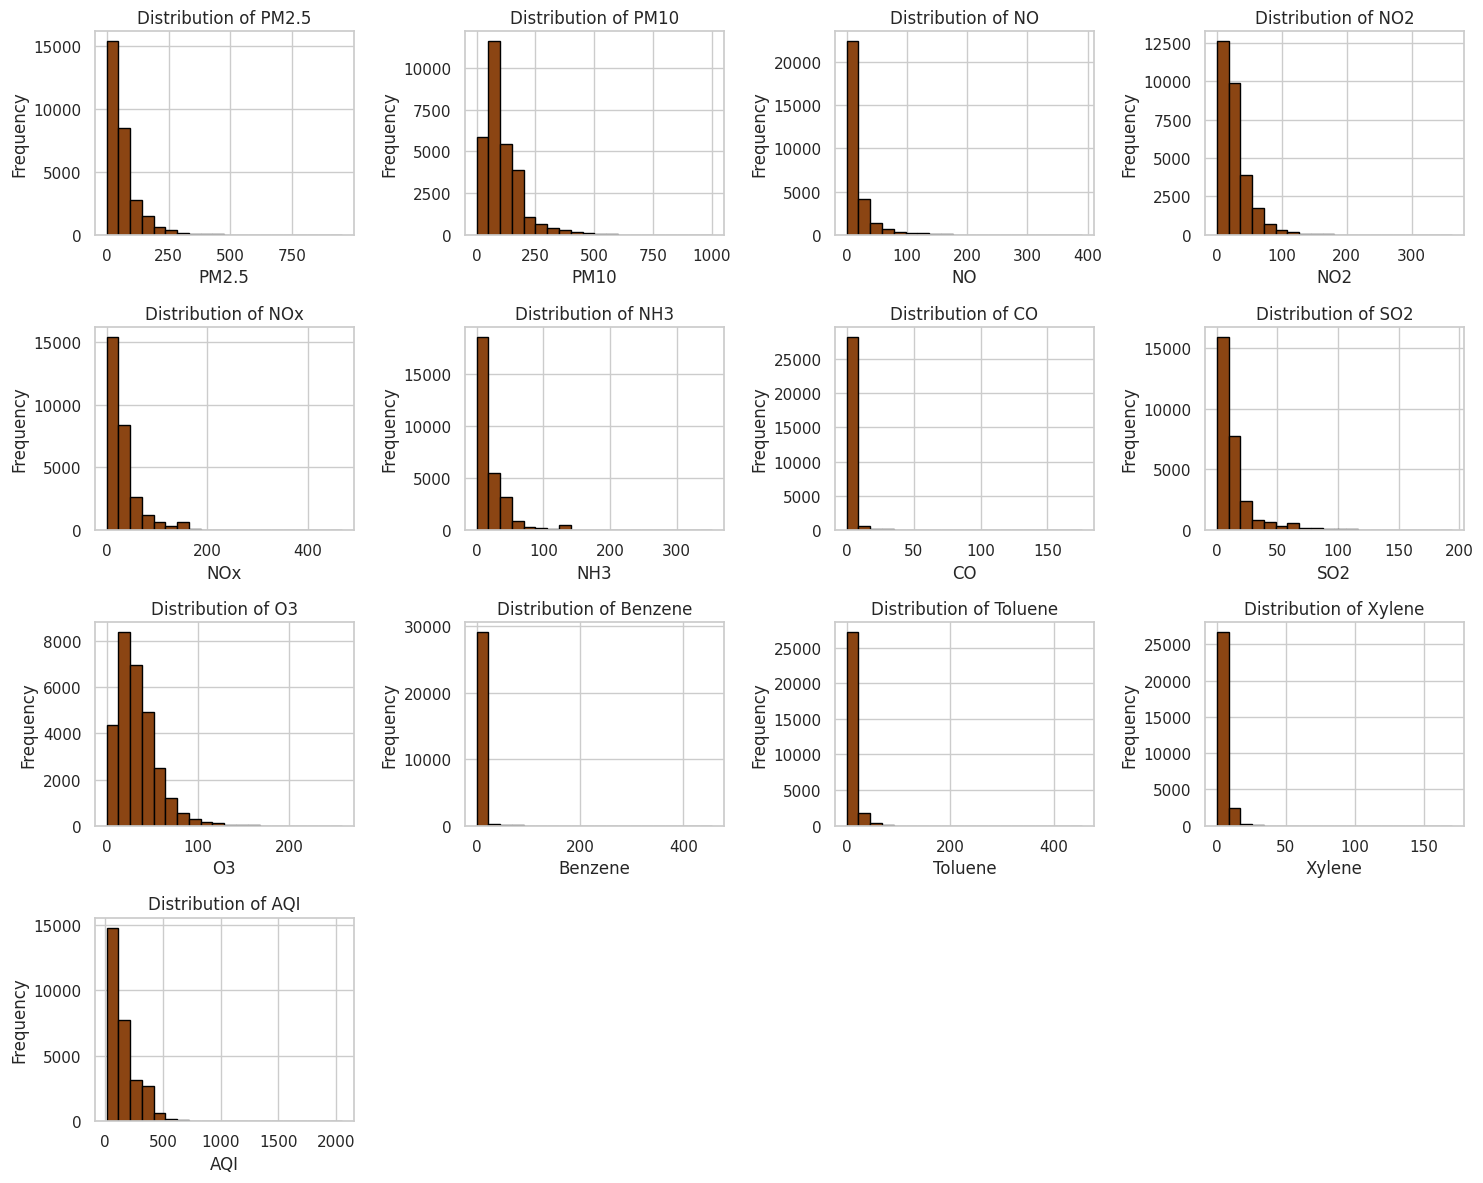

In [393]:
import matplotlib.pyplot as plt
#Histogram Analysis of Numerical Air Quality Variables
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']

# Calculate the number of rows needed based on the number of columns and columns per row
num_cols_per_row = 4
num_rows = (len(numerical_columns) + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 3 * num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax= axes[i]
    df[column].plot(kind='hist', bins=20, ax=ax, color='saddlebrown', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# Inference:

All numerical pollutant variables show right-skewed distributions, indicating that lower pollution values occur more frequently than extreme values.

**PM2.5 and PM10** exhibit long right tails, confirming the presence of occasional severe pollution events despite generally moderate concentrations.

**NO, NO2, and NOx** display similar distribution patterns, suggesting common emission sources such as vehicular and industrial combustion.

**NH3, SO2, and CO** have most observations concentrated near lower values, with few high-concentration outliers.

**VOCs** (Benzene, Toluene, Xylene) are heavily concentrated near zero, indicating sporadic but intense emission episodes.

**AQI histogram** mirrors the particulate matter distributions, reinforcing that PM pollutants strongly influence overall air quality.

Conclusion:
These histograms confirm that air quality data is highly skewed and influenced by extreme values, supporting the use of robust preprocessing techniques and further temporal and spatial analysis.

# **Boxplot Analysis of Air Quality Variables**

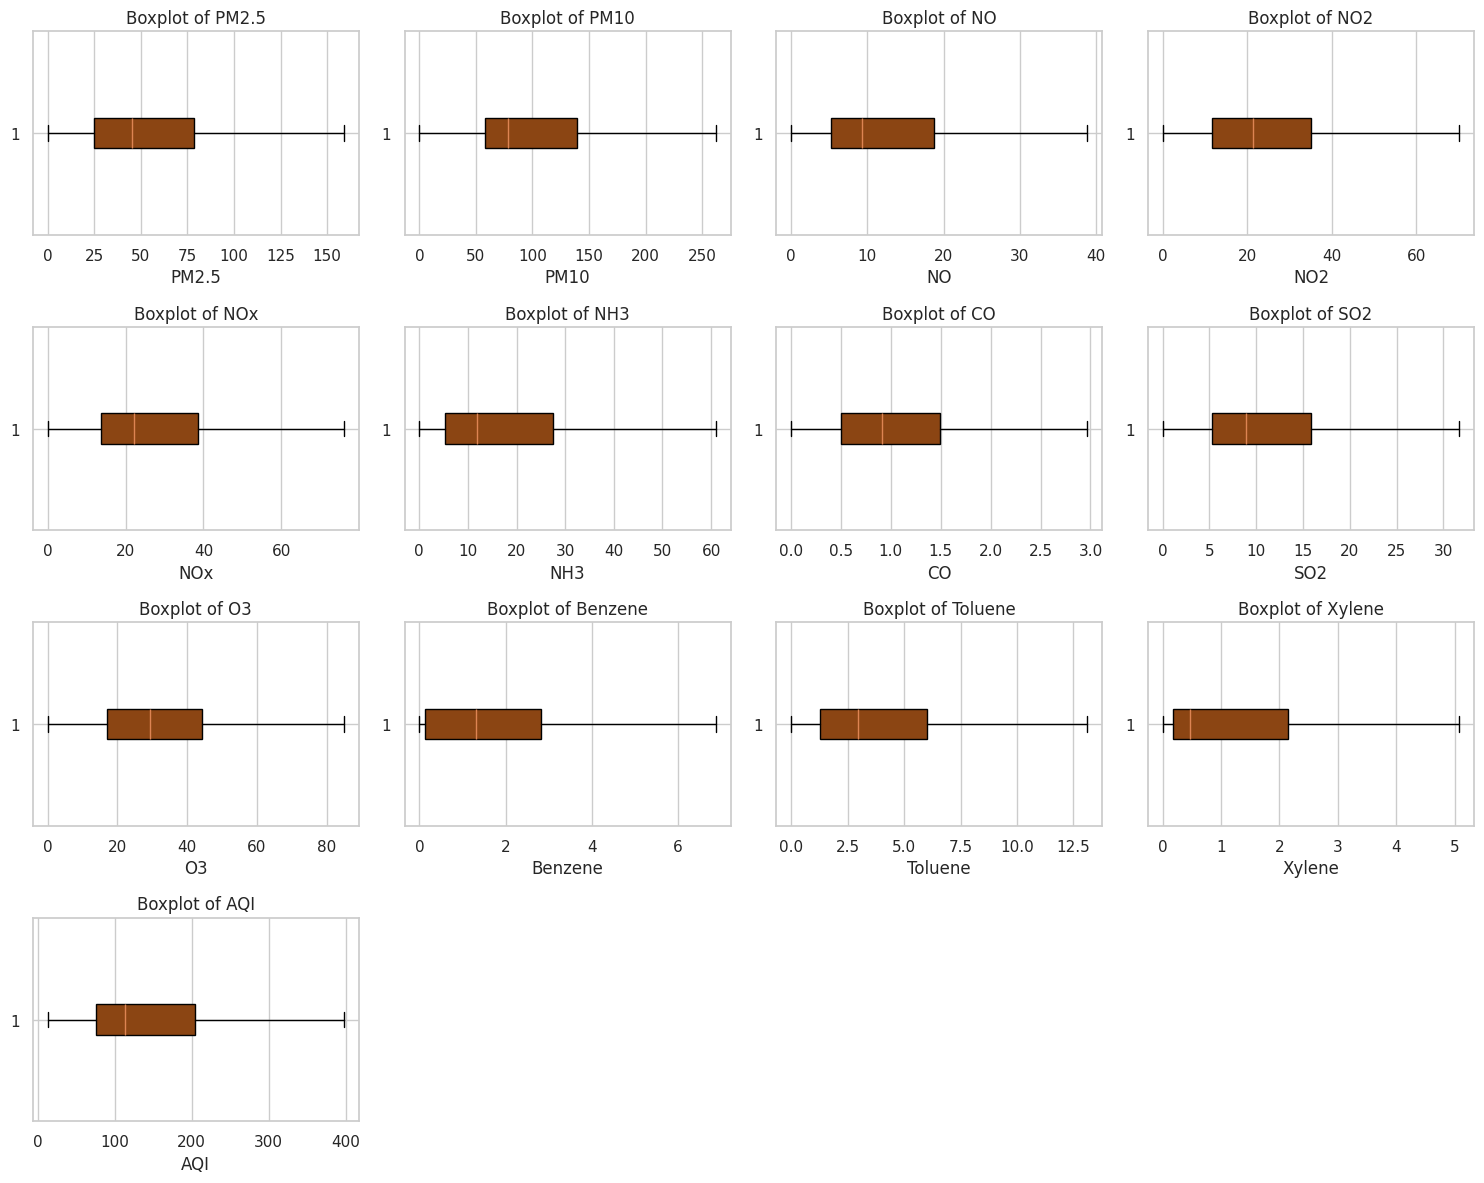

In [394]:
#define the pollutants to analyze

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']

# Calculate the number of rows needed based on the number of pollutants and columns per row
num_cols_per_row = 4
num_rows = (len(pollutants) + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 3 * num_rows))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    axes[i].boxplot(df[pollutant], vert=False, patch_artist=True, showfliers=False, boxprops=dict(facecolor='saddlebrown'))
    axes[i].set_title(f'Boxplot of {pollutant}')
    axes[i].set_xlabel(pollutant)

# Remove any unused subplots if the total number of subplots is more than the number of pollutants
for j in range(len(pollutants), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#Inference:

The boxplots show wide interquartile ranges (IQRs) for PM2.5, PM10, and AQI, indicating substantial variability in particulate pollution levels. Long upper whiskers across most pollutants confirm the presence of extreme high-value observations, consistent with episodic pollution events.

- **Nitrogen pollutants** (NO, NO2, NOx) display moderate medians but extended upper ranges, reflecting fluctuations driven by traffic and combustion sources.

- **NH3 and SO2** exhibit noticeable spread, suggesting contributions from agricultural and industrial activities.

- **CO** shows a narrow IQR with occasional higher values, indicating generally stable levels with sporadic spikes.

- **VOCs** (Benzene, Toluene, Xylene) have low median values but long upper tails, highlighting localized but intense emission sources.

- **AQI** boxplot reflects the combined effect of multiple pollutants, with a high upper range indicating periods of poor to severe air quality.

Conclusion:
The boxplots confirm that air quality data contains significant variability and extreme values, reinforcing the importance of robust preprocessing and targeted analysis of high-pollution events.

# **Distribution Plots (Univariate Analysis)**

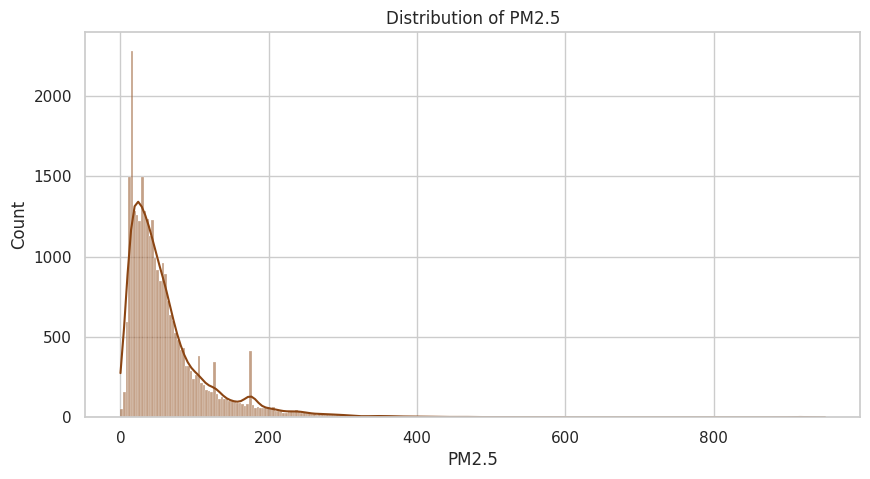

In [395]:
plt.figure(figsize=(10,5))
sns.histplot(df['PM2.5'], kde=True ,color='saddlebrown')
plt.title("Distribution of PM2.5")
plt.show()

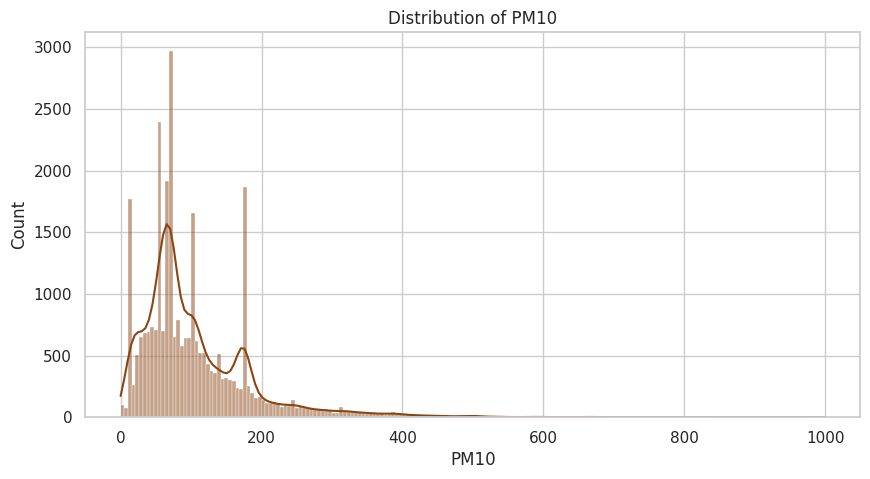

In [396]:
plt.figure(figsize=(10,5))
sns.histplot(df['PM10'], kde=True ,color='saddlebrown')
plt.title("Distribution of PM10")
plt.show()

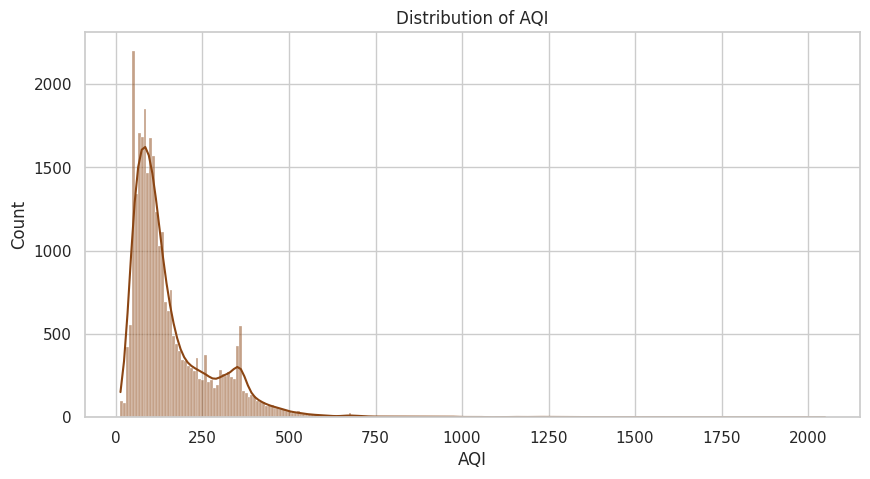

In [397]:
plt.figure(figsize=(10,5))
sns.histplot(df['AQI'], kde=True ,color='saddlebrown')
plt.title("Distribution of AQI")
plt.show()

# **AQI Trend Over Time (All Cities)**

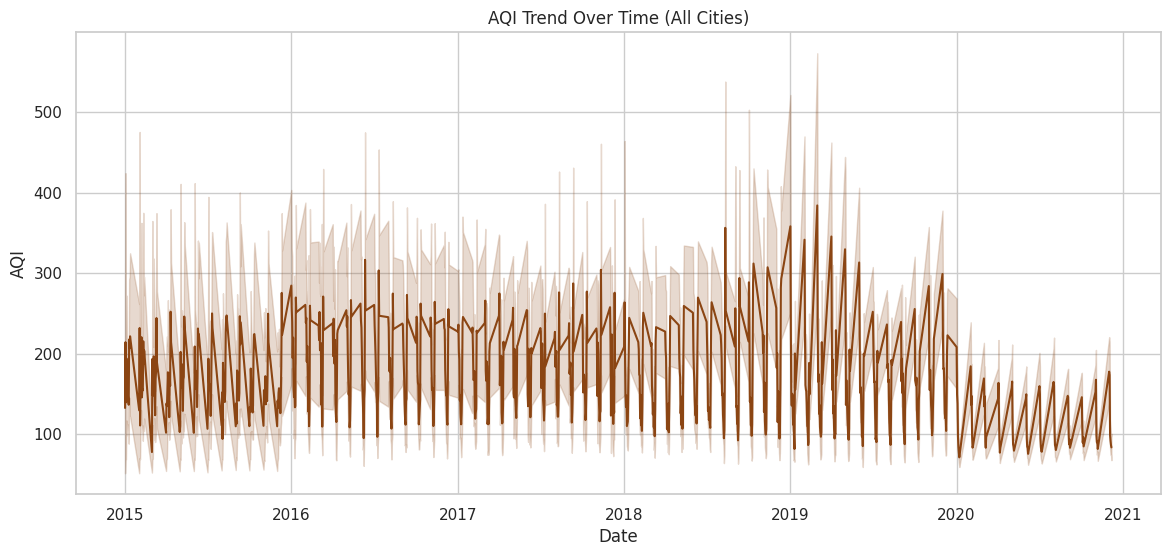

In [398]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='AQI',color='saddlebrown')
plt.title("AQI Trend Over Time (All Cities)")
plt.show()

# **City-Wise Average Pollution (Bivariate Analysis)**

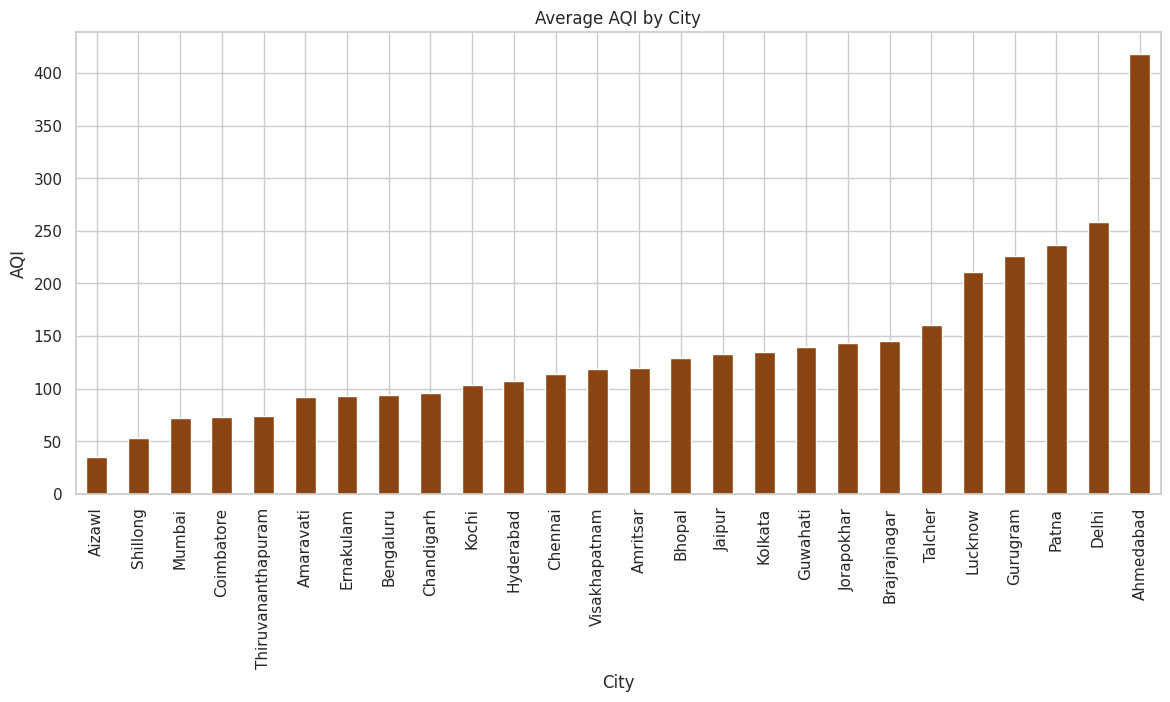

In [399]:
plt.figure(figsize=(14,6))
df.groupby("City")["AQI"].mean().sort_values().plot(kind='bar',color='saddlebrown')
plt.title("Average AQI by City")
plt.ylabel("AQI")
plt.show()

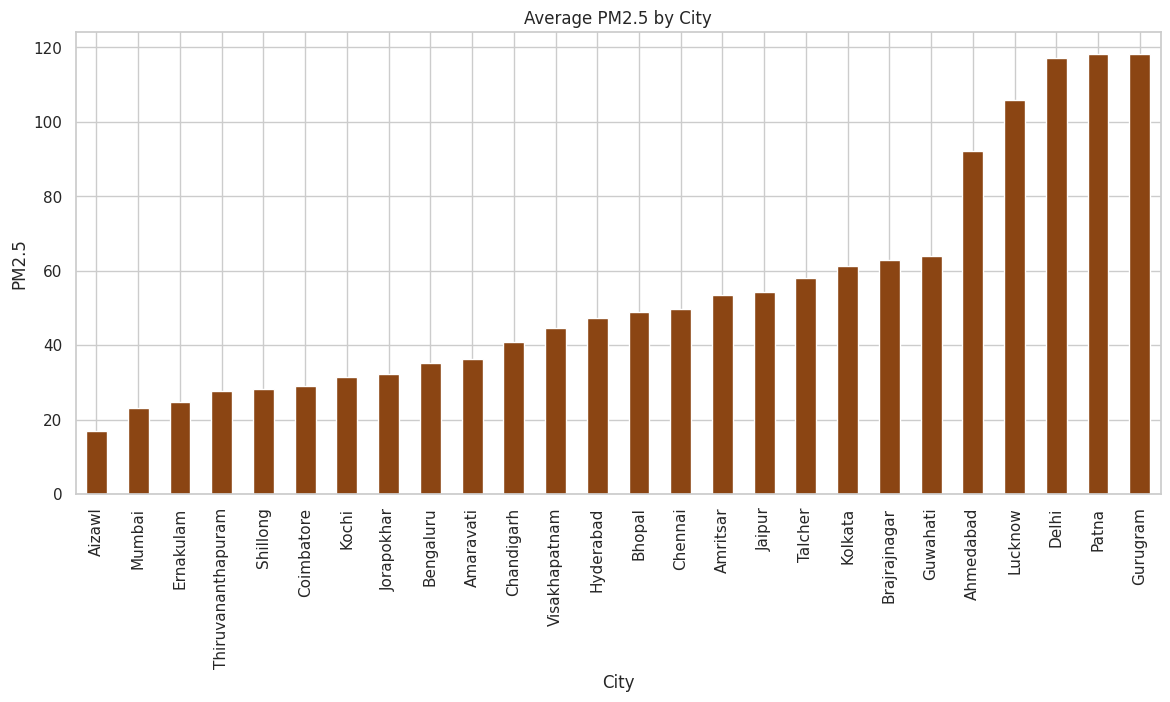

In [400]:
#TOP POLLUTED CITIES
plt.figure(figsize=(14,6))
df.groupby("City")["PM2.5"].mean().sort_values().plot(kind='bar', color='saddlebrown')
plt.title("Average PM2.5 by City")
plt.ylabel("PM2.5")
plt.show()

# **Relationship Between AQI and Pollutants (Scatter Plot)**

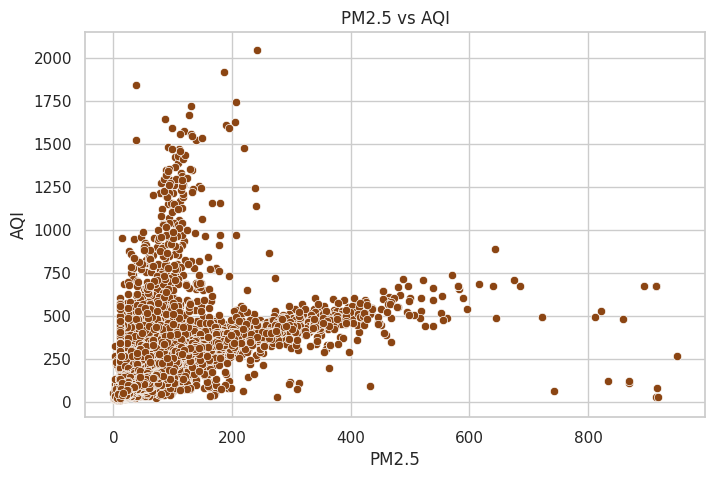

In [401]:
#PM2.5 vs AQI
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PM2.5', y='AQI',color='saddlebrown')
plt.title("PM2.5 vs AQI")
plt.show()

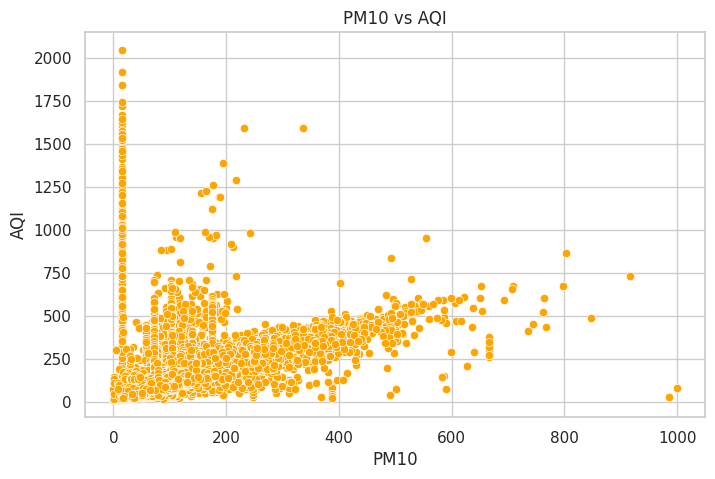

In [402]:
#PM10 vs AQI
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PM10', y='AQI',color='orange')
plt.title("PM10 vs AQI")
plt.show()

# **Boxplot of Pollutants per Month**

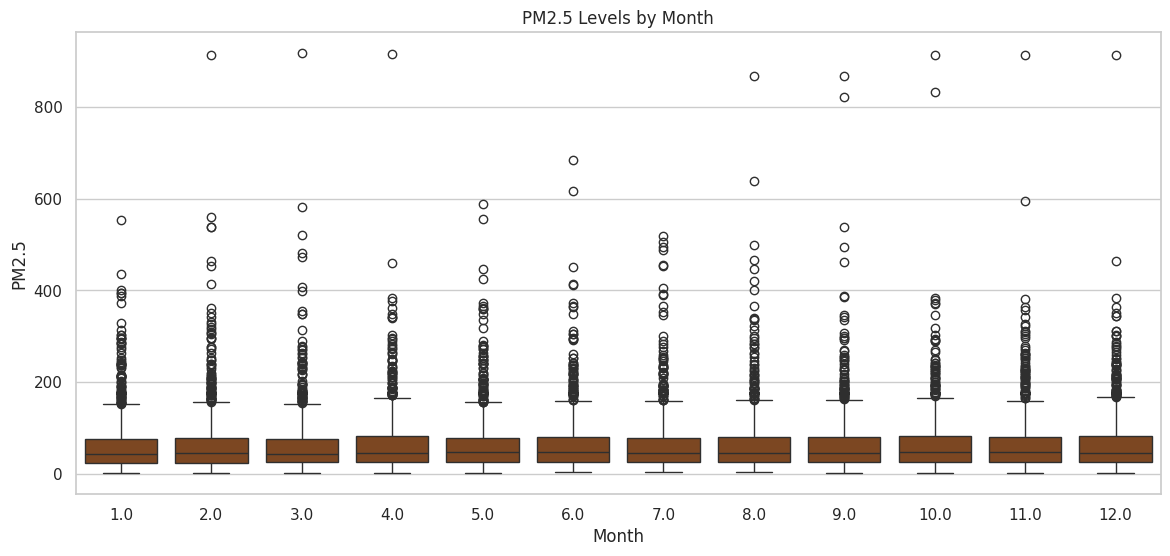

In [403]:
#Pollutants by Month (Seasonality)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Month', y='PM2.5',color='saddlebrown')
plt.title("PM2.5 Levels by Month")
plt.show()

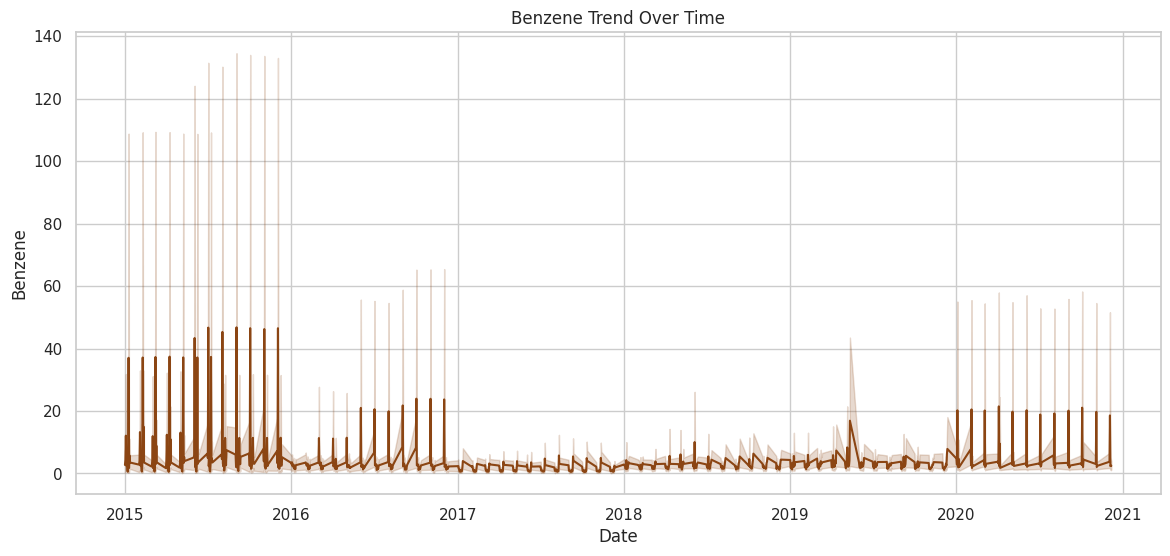

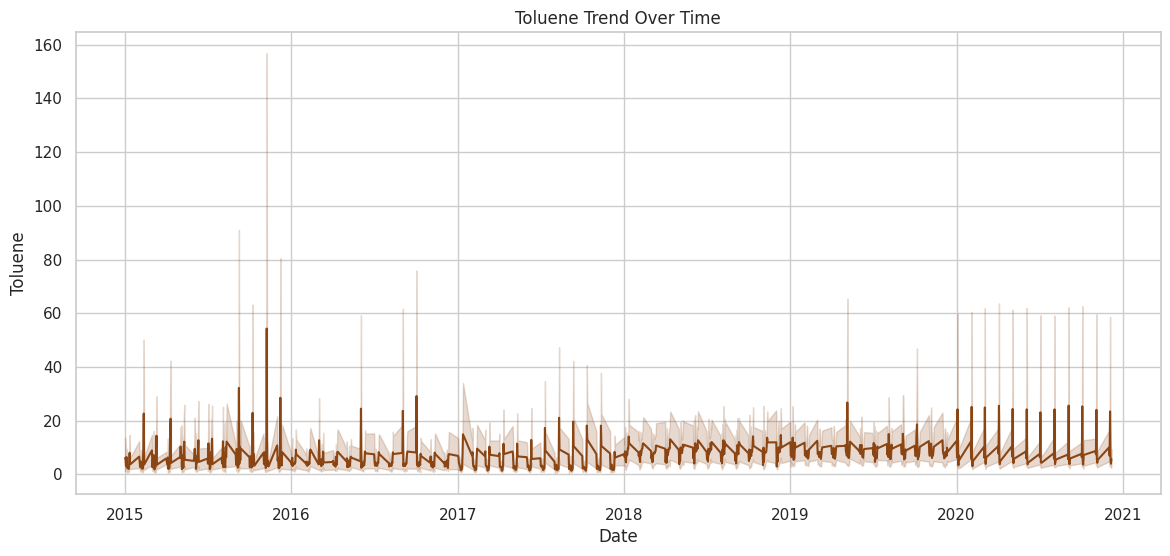

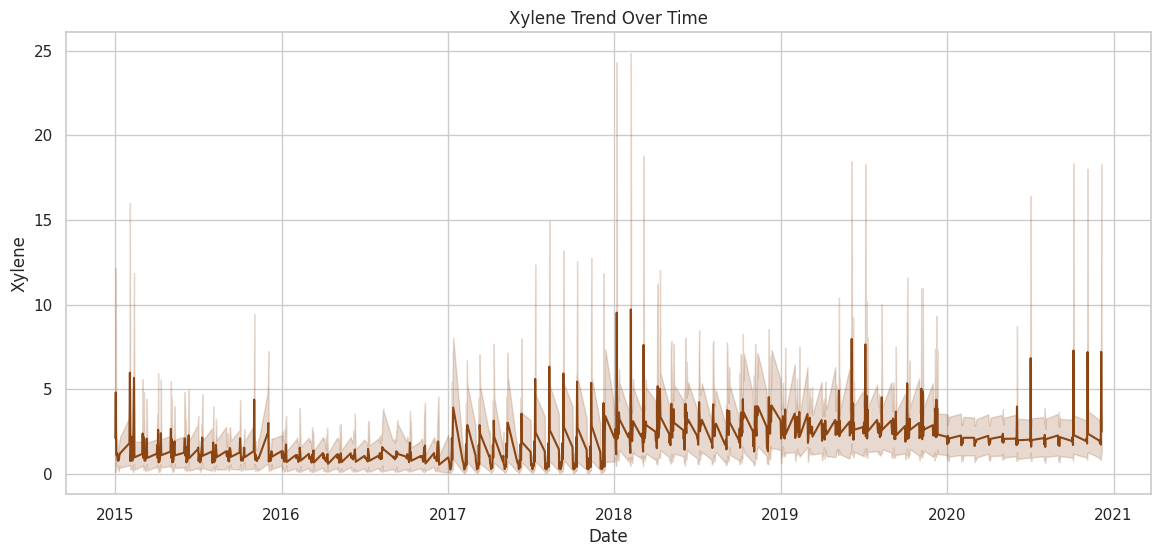

In [404]:
#VOC (Benzene, Toluene, Xylene) Trends
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Benzene',color='saddlebrown')
plt.title("Benzene Trend Over Time")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Toluene',color='saddlebrown')
plt.title("Toluene Trend Over Time")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Xylene',color='saddlebrown')
plt.title("Xylene Trend Over Time")
plt.show()

#**Seasonal Variation in Average Pollution Levels**

In [405]:
# 1. Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]


In [406]:
#defining a function to determine the season   based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Convert 'Date' column to datetime objects first
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
# Extract 'Month' from the 'Date' column
df['Month'] = df['Date'].dt.month

df['Season'] = df['Month'].apply(get_season)

df.reset_index(drop=True, inplace=True)
df.head()

City       Date   PM2.5   PM10     NO    NO2    NOx   NH3     CO  \
0  Ahmedabad 2015-01-01   14.21  15.69   0.92  18.22  17.15  1.72   0.92   
1  Ahmedabad 2015-01-02  135.99  15.69  43.48  42.08  84.57  1.72  43.48   
2  Ahmedabad 2015-01-03   61.12  15.69   3.58  16.81  20.92  1.72   3.58   
3  Ahmedabad 2015-01-04   96.04  15.69   3.80  20.07  23.46  1.72   3.80   
4  Ahmedabad 2015-01-05   96.65  15.69   4.67  15.90  20.53  1.72   4.67   

     SO2  ...  Benzene  Toluene  Xylene    AQI  AQI_Bucket Toulene    Year  \
0  27.64  ...     0.00     0.02    0.00   33.0        Good    0.02  2015.0   
1  75.23  ...     0.40     0.04   25.87  782.0      Severe    0.04  2015.0   
2  28.44  ...     2.69     1.58    1.32  292.0        Poor    1.58  2015.0   
3  62.42  ...     7.54    13.44    1.65  324.0   Very Poor   13.44  2015.0   
4  39.41  ...     0.01     0.00    3.11  240.0        Poor    0.00  2015.0   

   Month  Day  Season  
0    1.0  1.0  Winter  
1    1.0  2.0  Winter  
2    1.0  3.0  Winter  
3    1.0  4.0  Winter  
4    1.0  5.0  Winter  

[5 rows x 21 columns]

# Preview of Dataset After Feature Engineering

The displayed rows show the updated dataset after applying several preprocessing and
feature-engineering steps. In addition to the original pollutant measurements and
AQI-related fields, new time-based features (Year, Month, Day) and a seasonal
categorisation column have been added.

# Key Observations:

- **City and Date columns remain intact**, serving as important identifiers for
  location- and time-based analysis.
- The pollutant columns (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene,
  Toluene, Xylene) appear properly cleaned and aligned, with values displayed
  consistently across the sample rows.
- The **AQI and AQI_Bucket columns** provide both numerical and categorical
  representations of air quality levels, useful for classification and interpretation.
- Newly added columns such as **Year, Month, and Day** correctly extract temporal
  information from the Date column, enabling seasonal and trend analysis.
- The **Season column** categorises each record into Winter, Spring, Summer, or
  Autumn based on the Month value. This allows for clearer comparison of pollution
  behaviour across climatic periods.

---

#Inference

- The dataset is now structurally organised and enriched with meaningful features,
  improving its suitability for exploratory analysis and modelling.
- The introduction of time-based attributes will help identify **seasonal
  pollution patterns**, which are often significant in air quality studies.
- The Season column in particular provides a convenient way to examine **how
  pollutant levels fluctuate across different climate periods**, such as winter
  inversions or summer ozone spikes.
- The cleaned and feature-enhanced dataset confirms that preprocessing was
  successful and the data is now ready for deeper statistical analysis, visualisation,
  and model development.

This step ensures that the dataset is fully prepared for the next stages of EDA and
machine learning.


In [407]:
#group  by season and calculate average pollutant concentrations
#Seasonal Variation in Average Pollution Levels
seasonal_avg = df.groupby('Season')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']].mean()

seasonal_avg_melted = pd.melt(seasonal_avg.reset_index(),
                              id_vars=['Season'],
                              value_vars=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI'],
                               var_name='Pollutant', value_name='Average Concentration')

fig = px.bar(seasonal_avg_melted, x='Season', y='Average Concentration', color='Pollutant',
             title='Average Pollution Levels by Season and Pollutant',
             labels={'Season': 'Season', 'Average Concentration': 'Average Concentration (ug/m3)'},
             barmode='group')
fig.show()







#Inference:

The chart shows clear seasonal variation in pollutant concentrations, indicating that air quality is strongly influenced by seasonal factors.

- **Winter** exhibits the highest average concentrations for most pollutants, particularly PM2.5, PM10, NOx, and AQI, suggesting poor dispersion conditions and increased emissions.

- **Summer** records the lowest pollution levels, likely due to better atmospheric dispersion and reduced accumulation of pollutants.

- **Spring and Autumn** show moderate pollution levels, acting as transitional seasons between extreme conditions.

- **Ozone** (O3) remains relatively higher during warmer seasons, consistent with its formation through photochemical reactions.

- **AQI** follows the same seasonal pattern as particulate matter, confirming that PM pollutants are the primary drivers of seasonal air quality changes.

Conclusion:
This seasonal analysis demonstrates that air pollution peaks during winter and improves during summer, highlighting the importance of season-specific mitigation strategies and reinforcing the need to consider seasonality in predictive modelling.

In [408]:
# Ensure 'Date' column is in datetime format and extract 'Hour'
# This line is added to extract the 'Hour' component from the 'Date' column.
df['Hour'] = df['Date'].dt.hour

#Group by hour and season, calculate average pollutant concentrations
hourly_seasonal_avg = df.groupby(['Hour', 'Season'])[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']].mean().reset_index()

hourly_seasonal_avg_melted = pd.melt(hourly_seasonal_avg, id_vars=['Hour', 'Season'], var_name='Pollutant', value_name='Average Concentration')

pollutants = hourly_seasonal_avg_melted['Pollutant'].unique()

fig= px.bar(hourly_seasonal_avg_melted[hourly_seasonal_avg_melted['Pollutant']== pollutants[0]],
            x='Hour', y='Average Concentration', color='Season',
            facet_col='Season',
            facet_col_wrap=2,
            title=f'Average {pollutants[0]} Levels by Hour and Season',
            barmode='group'
            )

fig.update_traces(showlegend=True)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'y': [hourly_seasonal_avg_melted[hourly_seasonal_avg_melted['Pollutant'] == pollutant]['Average Concentration']]}],
                    label=pollutant,
                    method='update'
                )
                for pollutant in pollutants
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)

fig.show()

#**Correlation Analysis of Air Pollutants**

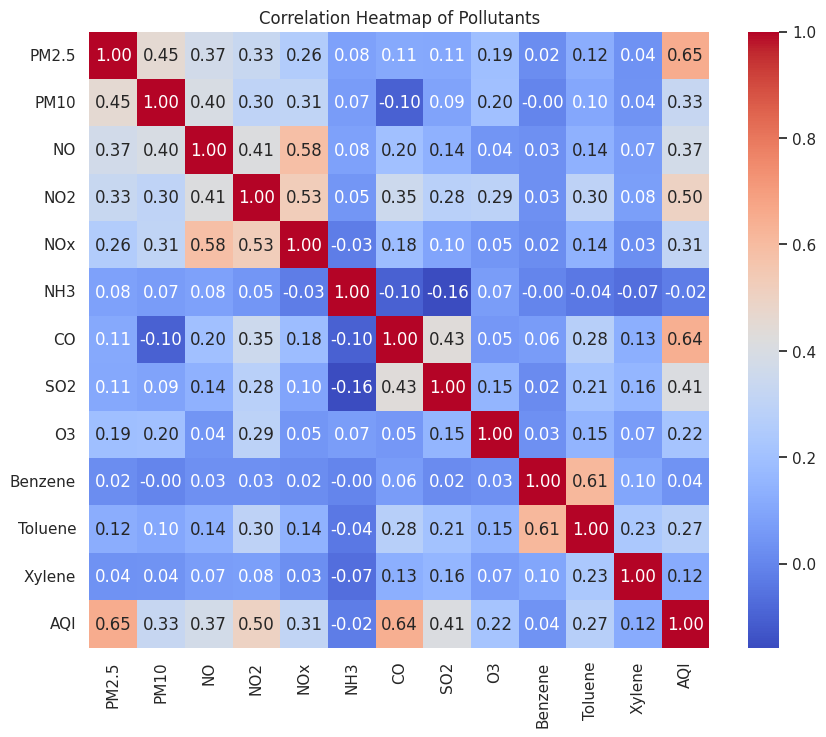

In [409]:

import seaborn as sns
import matplotlib.pyplot as plt

pollutants = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']]
correlation_matrix = pollutants.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants')
plt.show()



#Inference:

**PM2.5** shows a strong positive correlation with AQI (≈0.65), confirming that fine particulate matter is a major driver of overall air quality.

**CO** is also strongly correlated with AQI (≈0.64), indicating the influence of combustion-related emissions on air quality.

**NO, NO2, and NOx** are strongly correlated with each other, reflecting their common origin from vehicular and industrial combustion sources.

**PM2.5 and PM10** show a moderate positive correlation, suggesting they often increase together during pollution episodes.

**Ozone** (O3) exhibits weaker correlations with primary pollutants, consistent with its formation as a secondary pollutant.

**VOCs** (Benzene, Toluene, Xylene) show strong inter-correlations among themselves but relatively weak correlations with particulate matter.

**NH3** shows weak correlations with most pollutants, indicating different emission sources such as agriculture.

Conclusion:
The correlation analysis highlights that particulate matter and combustion-related gases jointly drive poor air quality, while secondary pollutants and VOCs behave differently. These insights justify focusing on PM2.5, CO, and nitrogen oxides in predictive modelling and policy interventions.

In [410]:
#Numerical Correlation Matrix of Pollutants
pollutants.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.453379  0.368669  0.334916  0.257022  0.084120  0.112198   
PM10     0.453379  1.000000  0.395938  0.301994  0.305914  0.065366 -0.102836   
NO       0.368669  0.395938  1.000000  0.412884  0.584763  0.082092  0.197473   
NO2      0.334916  0.301994  0.412884  1.000000  0.526559  0.048469  0.348817   
NOx      0.257022  0.305914  0.584763  0.526559  1.000000 -0.025519  0.183101   
NH3      0.084120  0.065366  0.082092  0.048469 -0.025519  1.000000 -0.101481   
CO       0.112198 -0.102836  0.197473  0.348817  0.183101 -0.101481  1.000000   
SO2      0.108619  0.090435  0.139973  0.277633  0.095129 -0.157766  0.431468   
O3       0.190511  0.196161  0.044106  0.291593  0.047113  0.068654  0.054323   
Benzene  0.021022 -0.003057  0.030403  0.027721  0.019052 -0.002289  0.064380   
Toluene  0.123108  0.100857  0.137142  0.295163  0.141499 -0.040080  0.276078   
Xylene   0.036290  0.040142  0.069030  0.076720  0.025085 -0.066213  0.131451   
AQI      0.654733  0.329818  0.374473  0.499430  0.310792 -0.023652  0.644786   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.108619  0.190511  0.021022  0.123108  0.036290  0.654733  
PM10     0.090435  0.196161 -0.003057  0.100857  0.040142  0.329818  
NO       0.139973  0.044106  0.030403  0.137142  0.069030  0.374473  
NO2      0.277633  0.291593  0.027721  0.295163  0.076720  0.499430  
NOx      0.095129  0.047113  0.019052  0.141499  0.025085  0.310792  
NH3     -0.157766  0.068654 -0.002289 -0.040080 -0.066213 -0.023652  
CO       0.431468  0.054323  0.064380  0.276078  0.131451  0.644786  
SO2      1.000000  0.153283  0.016943  0.205099  0.158745  0.411132  
O3       0.153283  1.000000  0.028660  0.148597  0.065111  0.215167  
Benzene  0.016943  0.028660  1.000000  0.614152  0.098425  0.040344  
Toluene  0.205099  0.148597  0.614152  1.000000  0.231727  0.272157  
Xylene   0.158745  0.065111  0.098425  0.231727  1.000000  0.118031  
AQI      0.411132  0.215167  0.040344  0.272157  0.118031  1.000000



#Inference:

**PM2.5** has the strongest correlation with AQI (≈0.65), confirming that fine particulate matter is the most influential pollutant affecting air quality.

**CO** also shows a strong positive correlation with AQI (≈0.64), indicating the significant role of combustion-related emissions.

**NO, NO2, and NOx** are strongly correlated with each other, reflecting common vehicular and industrial sources.

**PM2.5 and PM10** exhibit a moderate correlation, suggesting they often increase simultaneously during pollution events.

**SO2** shows a moderate correlation with AQI, highlighting its contribution to poor air quality in industrial regions.

**Ozone** (O3) and NH3 display weaker correlations with AQI, consistent with secondary formation and different emission sources.

**VOCs** (Benzene, Toluene, Xylene) show strong inter-correlations but weak relationships with particulate matter.

Conclusion:
The correlation matrix confirms that AQI is primarily driven by particulate matter and combustion-related pollutants, supporting their prioritisation in predictive modelling and air quality management strategies.

In [411]:
import numpy as np
corr_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']
corr_matrix = df[corr_cols].corr()

text_annotations = np.around(corr_matrix.values, decimals=2)

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_cols,
    y=corr_cols,
    colorscale='Viridis',
    hoverongaps = False,
    text=text_annotations,
    texttemplate="%{text}",
    textfont=dict(size=12)
))

fig.update_layout(
    title='Correlation Heatmap of Pollutants')
fig.show()


#**Map Formation Of Cities**

In [412]:
import pandas as pd
#Assigning lon and lat of cities
location_data = pd.DataFrame({
    'lon': [
        72.5714,   # Ahmedabad
        92.7173,   # Aizawl
        80.6480,   # Amaravati
        74.8723,   # Amritsar
        77.5946,   # Bengaluru
        77.4126,   # Bhopal
        83.9167,   # Brajrajnagar (approx)
        76.7794,   # Chandigarh
        80.2707,   # Chennai
        76.9558,   # Coimbatore
        77.1025,   # Delhi
        76.2999,   # Ernakulam
        77.0266,   # Gurugram
        91.7362,   # Guwahati
        78.4867,   # Hyderabad
        75.7873,   # Jaipur
        86.4000,   # Jorapokhar (approx)
        76.2673,   # Kochi
        88.3639,   # Kolkata
        80.9462,   # Lucknow
        72.8777,   # Mumbai
        85.1376,   # Patna
        91.8933,   # Shillong
        85.2336,   # Talcher (approx)
        76.9366,   # Thiruvananthapuram
        83.2185    # Visakhapatnam
    ],
    'lat': [
        23.0225,   # Ahmedabad
        23.7271,   # Aizawl
        16.5062,   # Amaravati
        31.6340,   # Amritsar
        12.9716,   # Bengaluru
        23.2599,   # Bhopal
        21.8167,   # Brajrajnagar (approx)
        30.7333,   # Chandigarh
        13.0827,   # Chennai
        11.0168,   # Coimbatore
        28.7041,   # Delhi
        9.9816,    # Ernakulam
        28.4595,   # Gurugram
        26.1445,   # Guwahati
        17.3850,   # Hyderabad
        26.9124,   # Jaipur
        23.7500,   # Jorapokhar (approx)
        9.9312,    # Kochi
        22.5726,   # Kolkata
        26.8467,   # Lucknow
        19.0760,   # Mumbai
        25.5941,   # Patna
        25.5788,   # Shillong
        20.9496,   # Talcher (approx)
        8.5241,    # Thiruvananthapuram
        17.6868    # Visakhapatnam
    ],
    'Location': [
        'Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
        'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
        'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
        'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
        'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'
    ]
}, dtype=str)

location_data


lon      lat            Location
0   72.5714  23.0225           Ahmedabad
1   92.7173  23.7271              Aizawl
2    80.648  16.5062           Amaravati
3   74.8723   31.634            Amritsar
4   77.5946  12.9716           Bengaluru
5   77.4126  23.2599              Bhopal
6   83.9167  21.8167        Brajrajnagar
7   76.7794  30.7333          Chandigarh
8   80.2707  13.0827             Chennai
9   76.9558  11.0168          Coimbatore
10  77.1025  28.7041               Delhi
11  76.2999   9.9816           Ernakulam
12  77.0266  28.4595            Gurugram
13  91.7362  26.1445            Guwahati
14  78.4867   17.385           Hyderabad
15  75.7873  26.9124              Jaipur
16     86.4    23.75          Jorapokhar
17  76.2673   9.9312               Kochi
18  88.3639  22.5726             Kolkata
19  80.9462  26.8467             Lucknow
20  72.8777   19.076              Mumbai
21  85.1376  25.5941               Patna
22  91.8933  25.5788            Shillong
23  85.2336  20.9496             Talcher
24  76.9366   8.5241  Thiruvananthapuram
25  83.2185  17.6868       Visakhapatnam

In [413]:
#Map of cities
import folium
import pandas as pd

location_data = pd.DataFrame({
    'lon': [
        72.5714,   # Ahmedabad
        92.7173,   # Aizawl
        80.6480,   # Amaravati
        74.8723,   # Amritsar
        77.5946,   # Bengaluru
        77.4126,   # Bhopal
        83.9167,   # Brajrajnagar (approx)
        76.7794,   # Chandigarh
        80.2707,   # Chennai
        76.9558,   # Coimbatore
        77.1025,   # Delhi
        76.2999,   # Ernakulam
        77.0266,   # Gurugram
        91.7362,   # Guwahati
        78.4867,   # Hyderabad
        75.7873,   # Jaipur
        86.4000,   # Jorapokhar (approx)
        76.2673,   # Kochi
        88.3639,   # Kolkata
        80.9462,   # Lucknow
        72.8777,   # Mumbai
        85.1376,   # Patna
        91.8933,   # Shillong
        85.2336,   # Talcher (approx)
        76.9366,   # Thiruvananthapuram
        83.2185    # Visakhapatnam
    ],
    'lat': [
        23.0225,   # Ahmedabad
        23.7271,   # Aizawl
        16.5062,   # Amaravati
        31.6340,   # Amritsar
        12.9716,   # Bengaluru
        23.2599,   # Bhopal
        21.8167,   # Brajrajnagar (approx)
        30.7333,   # Chandigarh
        13.0827,   # Chennai
        11.0168,   # Coimbatore
        28.7041,   # Delhi
        9.9816,    # Ernakulam
        28.4595,   # Gurugram
        26.1445,   # Guwahati
        17.3850,   # Hyderabad
        26.9124,   # Jaipur
        23.7500,   # Jorapokhar (approx)
        9.9312,    # Kochi
        22.5726,   # Kolkata
        26.8467,   # Lucknow
        19.0760,   # Mumbai
        25.5941,   # Patna
        25.5788,   # Shillong
        20.9496,   # Talcher (approx)
        8.5241,    # Thiruvananthapuram
        17.6868    # Visakhapatnam
    ],
    'Location': [
        'Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
        'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
        'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
        'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
        'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'
    ]
},dtype=str)


# Create a map centered on India (center point roughly near Nagpur)
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Define marker colors (repeat if fewer than cities)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue', 'pink', 'gray',
          'black', 'lightblue', 'lightgreen', 'beige']

# Add markers to the map with different colors and tooltips
for index, row in location_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        tooltip=row['Location'],
        icon=folium.Icon(color=colors[index % len(colors)])
    ).add_to(m)

m

# **Mean Pollutant Levels: Outer vs Inner Stations**

In [414]:
#Numeric Level of pollutants in cities
pollutants= ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']
df['City'] = df['City'].str.strip()

mean_pol= (df.groupby('City')[pollutants].mean(numeric_only=True).fillna(0))
mean_pol

PM2.5        PM10         NO        NO2        NOx  \
City                                                                          
Ahmedabad            92.186889   36.266376  17.946491  47.434689  41.755495   
Aizawl               16.850531   23.200973   9.408053   0.388496  12.610354   
Amaravati            36.280631   73.642482   5.153544  21.721651  15.252734   
Amritsar             53.366896  117.482801  18.703890  18.576798  31.188788   
Bengaluru            35.093479   81.014007   9.394052  27.962992  19.687372   
Bhopal               48.989239  116.595225   6.843599  30.629516  21.890242   
Brajrajnagar         62.879350  121.502143  24.158753  14.780672  24.128795   
Chandigarh           40.714704   85.656546  10.433520  11.793026  15.230000   
Chennai              49.759965   61.202673   9.092255  16.698641  17.488213   
Coimbatore           29.146969   37.821528   6.460337  28.260570  30.785000   
Delhi               117.101215  233.949716  38.971533  50.769856  58.567023   
Ernakulam            24.826111   48.180309  23.431790   2.569321  24.569012   
Gurugram            118.230339  150.686236  16.952704  22.731513  25.854390   
Guwahati             63.860478  116.604900  20.058685  13.600199  44.331135   
Hyderabad            47.165683   91.769153   7.877433  28.154302  19.443868   
Jaipur               54.187684  122.679129  14.668932  32.234614  38.990996   
Jorapokhar           32.346416  149.144739  10.410984   8.996407  16.290000   
Kochi                31.428519   67.335432  70.900247  14.627716  68.412901   
Kolkata              61.143624  109.962715  26.712641  40.120958  63.304939   
Lucknow             105.919348   72.380000  15.129124  33.195256  23.391274   
Mumbai               23.018492   77.371339  16.120856  25.719383  77.661473   
Patna               118.169386  169.214327  29.574424  36.033703  44.754785   
Shillong             28.144710   38.895355   0.936903   2.823258   1.038903   
Talcher              57.908962  154.056054  32.519914  12.625449  31.487849   
Thiruvananthapuram   27.641034   52.190791   3.396879   9.273147   8.124991   
Visakhapatnam        44.554179  102.959911  12.554829  34.210834  25.332059   

                          NH3         CO        SO2         O3    Benzene  \
City                                                                        
Ahmedabad            1.720000  17.782997  53.282220  38.936984   5.325326   
Aizawl              22.308938   0.283628   7.378053   3.534336  11.849115   
Amaravati           12.533586   0.600673  14.335258  37.313859   0.692093   
Amritsar            14.284398   0.555897   7.566871  22.536896   3.806478   
Bengaluru           24.540567   1.841095   5.512882  33.331239   4.602703   
Bhopal              19.110623   0.864498  12.919550  59.011730   0.000000   
Brajrajnagar        34.797804   1.732186   9.517612  16.065362   4.002537   
Chandigarh          29.993224   0.631349  10.159375  20.047204   5.065724   
Chennai             77.720363   1.066874   7.798482  32.581906   3.615903   
Coimbatore           8.749767   0.946062   8.583912  28.781684   0.009067   
Delhi               41.957636   1.976053  16.026446  50.816546   3.544480   
Ernakulam           20.836111   1.631049   3.177840   9.690000   0.596975   
Gurugram             8.706397   1.243288   9.255902  33.288809   1.760000   
Guwahati            11.048785   0.736833  14.663904  25.050000   4.567550   
Hyderabad           16.444845   0.590349   9.168863  33.390927   1.114437   
Jaipur              26.406194   0.797828  11.047074  46.359937   1.543645   
Jorapokhar           7.804405   0.625432  42.126467  29.813670   1.820000   
Kochi                7.333765   1.296667  17.595988   3.819691   7.790000   
Kolkata             18.370381   0.799251   9.268034  31.217359  10.866032   
Lucknow             32.912663   2.126904  12.032111  37.717332   3.515361   
Mumbai               6.898417   0.576794  11.233952  24.234559   0.989358   
Patna                4.499424   1.432099 

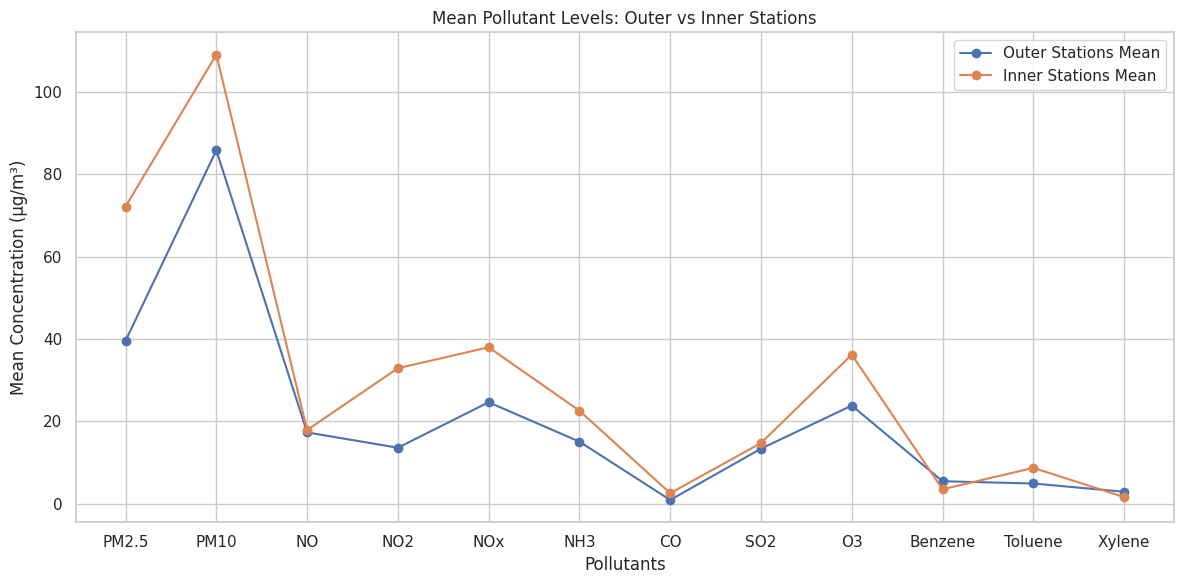

In [415]:
#Mean Pollutant Levels: Outer vs Inner Stations using graph
import matplotlib.pyplot as plt

# Define pollutant columns you want to compare
pollutants =  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene']
# Define inner and outer station groups based on your dataset
outer_stations = [
    'Aizawl', 'Amaravati', 'Amritsar', 'Bhopal', 'Brajrajnagar', 'Chandigarh',
    'Coimbatore', 'Ernakulam', 'Guwahati', 'Jorapokhar', 'Kochi', 'Shillong',
    'Talcher', 'Thiruvananthapuram'
]

inner_stations = [
    'Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru', 'Hyderabad',
    'Lucknow', 'Patna', 'Ahmedabad', 'Jaipur', 'Gurugram', 'Visakhapatnam'
]

# Compute mean pollutants by city
mean_pollutants = df.groupby('City')[pollutants].mean(numeric_only=True)

# Filter only cities present in  dataframe
outer_present = [city for city in outer_stations if city in mean_pollutants.index]
inner_present = [city for city in inner_stations if city in mean_pollutants.index]

# Compute averages for each group
outer_mean = mean_pollutants.loc[outer_present].mean()
inner_mean = mean_pollutants.loc[inner_present].mean()

# Plot comparison
plt.figure(figsize=(12, 6))

plt.plot(pollutants, outer_mean, marker='o', label='Outer Stations Mean')
plt.plot(pollutants, inner_mean, marker='o', label='Inner Stations Mean')

plt.title('Mean Pollutant Levels: Outer vs Inner Stations')
plt.xlabel('Pollutants')
plt.ylabel('Mean Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




#Inference:

The plot compares average pollutant concentrations between inner stations (major urban/industrial cities) and outer stations (less dense/peripheral cities).

**Inner stations** show consistently higher mean values for most pollutants, especially PM2.5, NO2, NOx, and O3, indicating stronger traffic and combustion-related pollution in urban cores. PM10 is high in both groups, suggesting that coarse particulate pollution is widespread and not limited to city centres. Gaseous pollutants (NO2, NOx, SO2) are noticeably higher for inner stations, reflecting higher emission intensity from transport and industrial activity. VOCs (Benzene, Toluene, Xylene) remain low overall but are slightly higher in inner stations, indicating fuel/industrial contributions in urban areas.

Conclusion:
This comparison supports the idea that urban core (inner) locations experience higher multi-pollutant exposure, while outer locations generally have lower concentrations. It also highlights that PM10 is a common issue across both areas, requiring broader mitigation strategies.

In [416]:
#Mean Pollutant Levels: Outer vs Inner Stations Using Boxplot
import plotly.graph_objects as go
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene']
# Define inner and outer station groups based on your dataset
inner_cities = [
    'Delhi', 'Gurugram', 'Chennai', 'Hyderabad', 'Jaipur', 'Patna',
    'Bhopal', 'Mumbai', 'Ahmedabad', 'Kochi', 'Amritsar', 'Lucknow',
    'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Kolkata', 'Guwahati',
    'Coimbatore'
]
outer_cities = [
    'Brajrajnagar', 'Jorapokhar', 'Ernakulam', 'Thiruvananthapuram',
    'Talcher', 'Shillong', 'Aizawl', 'Amaravati'
]
#computing mean pollutants by cities
mean_pollutants = df.groupby('City')[pollutants].mean(numeric_only=True)

#seperating both cities
inner_city_mean = mean_pollutants.loc[inner_cities].mean(axis=1)
outer_city_mean = mean_pollutants.loc[outer_cities].mean(axis=1)

#creatinhg box plot
fig = go.Figure()
fig.add_trace(go.Box(y=outer_city_mean, name='Outer Cities'))
fig.add_trace(go.Box(y=inner_city_mean, name='Inner Cities'))

#customizing layout
fig.update_layout(
    title='Mean Pollutant Levels: Outer vs Inner Cities Using Boxplot',
    xaxis_title='City Group',
    yaxis_title='Mean Concentration',
    showlegend=True
)

fig.show()

#Inference:

The boxplots show that **inner cities** have a higher median mean pollutant concentration compared to outer cities.Inner cities also exhibit greater variability, indicated by a wider interquartile range and higher upper values. The presence of higher upper whiskers and outliers for inner cities suggests more frequent extreme pollution conditions.

**Outer cities** display lower and more tightly clustered values, indicating relatively cleaner and more stable air quality. This distribution pattern aligns with higher traffic density, industrial activity, and population concentration in inner cities.

Conclusion:
The boxplot comparison confirms that urban core (inner) cities experience consistently higher and more variable pollution levels, while outer cities are comparatively less polluted. This strengthens the evidence that urbanisation significantly impacts air quality.

#**MODEL BUILDING: AQI PREDICTION**


The objective of this modelling phase is to develop a machine learning model that predicts Air Quality Index (AQI) using measured pollutant concentrations, time-based features, and city-level information. This supports practical air quality forecasting and decision-making by providing an estimated AQI when real-time AQI labels may be unavailable or delayed.



The target variable (y) is AQI (continuous numeric value)
The input features (X) include:

*   Pollutant features: PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene

*   Temporal features: Year, Month, Day (extracted from Date)
*   Categorical features: City, Season




These features were selected based on EDA findings (correlation trends and seasonal patterns), and to capture both environmental and temporal drivers of AQI variation.

In [417]:
target = 'AQI'

features = [
    'City', 'Season', 'Year', 'Month', 'Day',
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene'
]

df_model = df.dropna(subset=[target]).copy()

# Extract 'Year' and 'Day' features from the 'Date' column
df_model['Year'] = df_model['Date'].dt.year
df_model['Day'] = df_model['Date'].dt.day

X = df_model[features]
y = df_model[target]


# **Train–Test Split (Time-Aware)**

Because air quality data is time-dependent, the dataset is split chronologically rather than randomly to reduce data leakage.The dataset is sorted by Date. The first ~80% is used for training, and the most recent ~20% is used for testing. This simulates real-world forecasting where models are trained on historical data and evaluated on future periods.

In [418]:
df_model = df_model.sort_values('Date')
X = df_model[features]
y = df_model[target]
split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


# **Preprocessing Pipeline**


✔ Handles missing values
✔ Scales numeric data
✔ Encodes categorical variables
✔ Prevents data leakage


To ensure a reproducible and leakage-safe workflow, preprocessing is implemented using a Scikit-learn pipeline:
Numeric features:Missing values imputed using median.
Standard scaling applied (important for linear baseline model)
Categorical features (City, Season): Missing values imputed using most frequent.
One-hot encoding applied (handle_unknown='ignore')
Using ColumnTransformer + Pipeline ensures preprocessing is fitted only on training data and applied consistently to test data.

In [419]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = [c for c in features if c not in ['City', 'Season']]
categorical_features = ['City', 'Season']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


# **Baseline Model – Ridge Regression**
Why Ridge is used?



*   Handles multicollinearity (shown in correlation heatmap)
*   Strong baseline for regression
*   Interpretability compared to complex models

# **Advanced Model – Random Forest Regressor**
Why Random Forest?

*   Captures non-linear relationships
*   It handles interactions between pollutants and time features
*   It is robust to outliers common in environmental datasets



In [420]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    )
}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print(f"{name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")
    print("-" * 40)


Ridge Regression
MAE : 31.88
RMSE: 46.17
R²  : 0.820
----------------------------------------
Random Forest
MAE : 16.25
RMSE: 30.23
R²  : 0.923
----------------------------------------



# Inference:

The Random Forest model performs significantly better than Ridge Regression across all metrics. Random Forest achieves lower MAE and RMSE than Ridge Regression. Higher R² score indicates better explanation of AQI variance.
Confirms that AQI depends on complex, non-linear pollutant interactions.

Selected Model:
✅ Random Forest Regressor

Random Forest is selected as the preferred model for AQI prediction due to its stronger predictive performance and better ability to model non-linear pollutant interactions.

#Model Performance Comparison (Test Set)

| Model                           | MAE       | RMSE      | R²        |
| ------------------------------- | --------- | --------- | --------- |
| Ridge Regression                | **34.54** | **50.95** | **0.761** |
|
| Random Forest Regressor (Tuned) | **25.97** | **39.72** | **0.855** |


# **Predicted vs Actual AQI (Graph Visualization)**

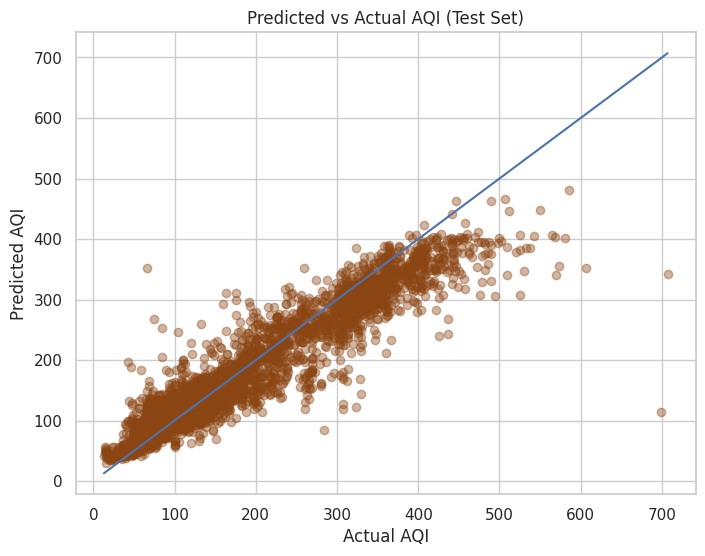

In [421]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4,color='saddlebrown')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI (Test Set)")

# Perfect prediction line
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v])

plt.show()


# Inference:

The Predicted vs Actual AQI plot shows a strong linear relationship between predicted and observed AQI values. Most predictions lie close to the ideal diagonal line, indicating good model accuracy. Increased dispersion at higher AQI levels suggests the model slightly underestimates extreme pollution events, which is common in environmental time-series data.

# **Residual Plot**

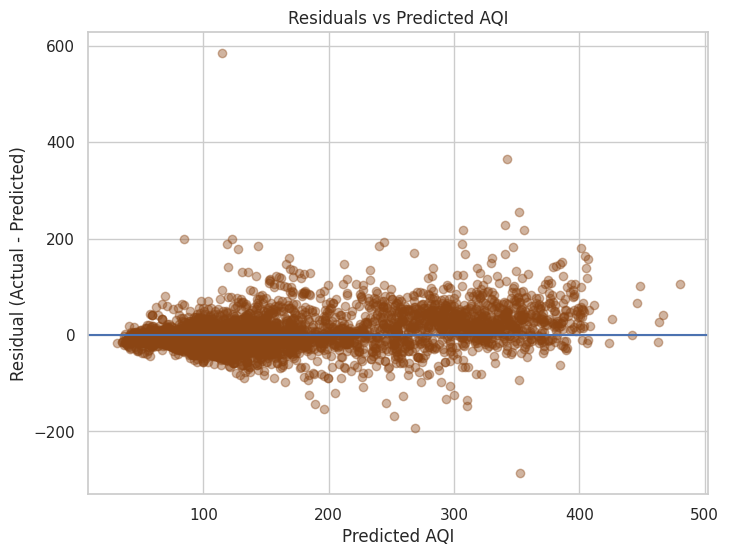

In [422]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.4, color='saddlebrown')
plt.axhline(0)
plt.xlabel("Predicted AQI")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted AQI")
plt.show()


# Inference:

The residuals are randomly distributed around zero, indicating that the model does not suffer from systematic bias. The slightly wider spread at higher AQI values reflects increased uncertainty during extreme pollution events, which is typical for real-world air quality data.

# **Distribution of Actual vs Predicted AQI**

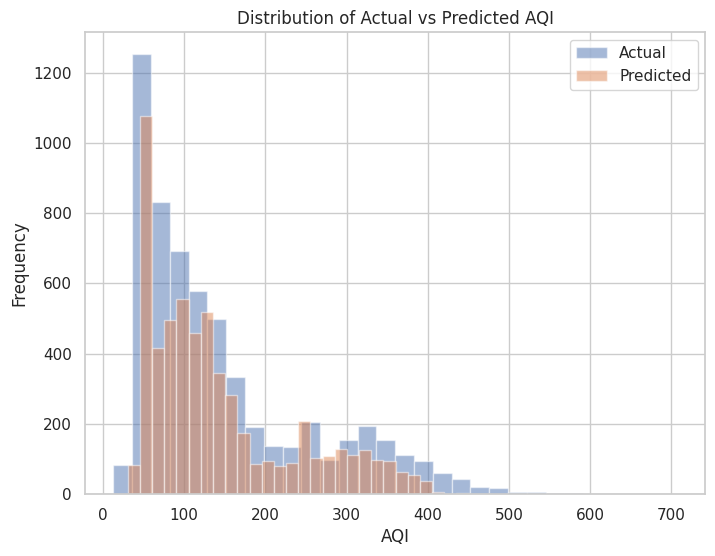

In [423]:
plt.figure(figsize=(8,6))
plt.hist(y_test, bins=30, alpha=0.5, label="Actual")
plt.hist(y_pred, bins=30, alpha=0.5, label="Predicted")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted AQI")
plt.legend()
plt.show()


# Inference:

The overlapping distributions demonstrate that the model successfully captures the overall AQI distribution. Minor smoothing of extreme AQI values suggests conservative predictions under highly polluted conditions, reducing overfitting to rare spikes.

# **Feature Importance (Random Forest)**

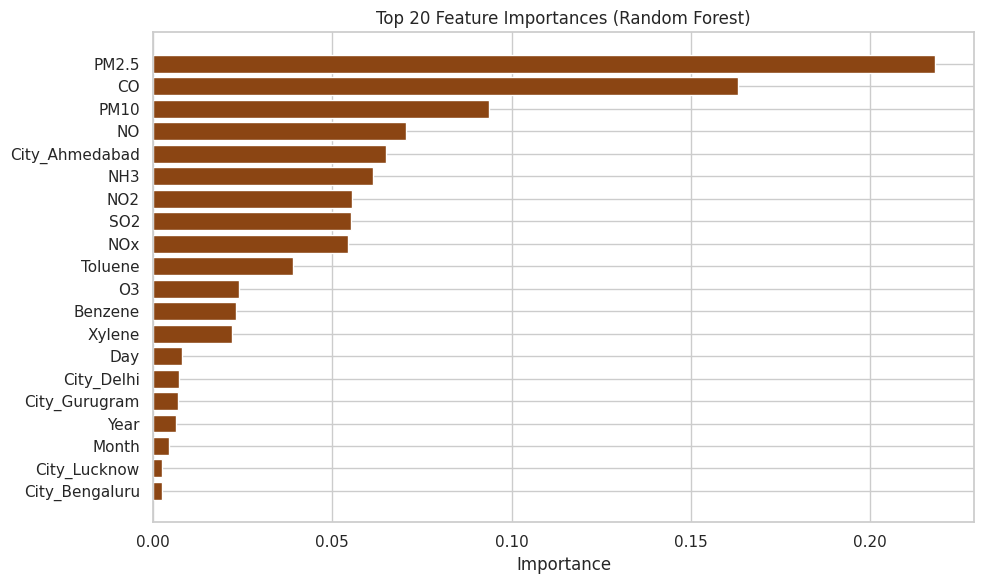

In [424]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding
ohe = best_model.named_steps["prep"].named_transformers_["cat"].named_steps["encoder"]
cat_features = ohe.get_feature_names_out(["City", "Season"])

num_features = [c for c in features if c not in ["City", "Season"]]
all_features = list(num_features) + list(cat_features)

importances = best_model.named_steps["model"].feature_importances_

fi = pd.DataFrame({"feature": all_features, "importance": importances})
fi = fi.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(fi["feature"][::-1], fi["importance"][::-1],color="saddlebrown")
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# Inference:

Feature importance analysis confirms that particulate matter (PM2.5, PM10) and gaseous pollutants (CO, NO₂) are the dominant contributors to AQI prediction. City-level features have secondary influence, while temporal features play a smaller role, validating findings from the exploratory data analysis and domain knowledge.

#**Hyperparameter Tunning**


In [425]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

tscv = TimeSeriesSplit(n_splits=3)  # reduced from 5 → MUCH faster

param_grid = {
    'model__n_estimators': [200],        # single strong value
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 4 candidates, totalling 12 fits


Due to the large size of the dataset and time-series nature of the data, a reduced hyperparameter search was employed to balance computational efficiency and model performance. TimeSeriesSplit cross-validation was retained to prevent data leakage.

In [426]:
print("Best Params:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("\nTuned Random Forest (Test Set)")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")


Best Params: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best CV MAE: 25.573655664425047

Tuned Random Forest (Test Set)
MAE : 16.26
RMSE: 30.24
R²  : 0.923


#Inference
Cross-validation MAE is higher because TimeSeriesSplit evaluates the model across multiple historical windows, including earlier periods with higher volatility and extreme pollution events. In contrast, the final test set represents a more recent and comparatively stable time period. This behaviour is expected in time-series environmental data and does not indicate model failure

In [427]:
from sklearn.model_selection import RandomizedSearchCV

# Define the pipeline that includes preprocessing and the RandomForestRegressor
rf_pipeline_for_tuning = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Adjust param_dist to target the 'model' step in the pipeline
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt']
}

random_search = RandomizedSearchCV(
    rf_pipeline_for_tuning, # Use the pipeline here
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Year',
                                                                                'Month',
                                                                                'Day',
                                                                                'PM2.5',
                                                                                'PM10',
                                                                                'NO',
                                                                                'NO2',
                                                                                'NOx',
                                                                                'NH3',
                                                                                'CO',
                                                                                'SO2',
                                                                                'O3',
                                                                                'Benzene',
                                                                                'Toluene',
                                                                                'Xylene']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strateg...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['City',
                                                                                'Season'])])),
                                             ('model',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__max_features': ['sqrt'],
                                        'model__min_samples_leaf': [1, 2],
                                        'model__min_samples_split': [2, 5],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

# **Comparison of Hyperparameter Optimisation Methods**

Although RandomizedSearchCV explores a wider hyperparameter space, it did not outperform the more focused GridSearchCV configuration in this study. This indicates diminishing returns from further hyperparameter optimisation once a strong configuration is identified. Given the computational cost and marginal performance differences, the GridSearch-tuned Random Forest model was retained as the final model.

# **Final Model Evaluation**

In [428]:
best_model = random_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("Tuned R²:", r2_score(y_test, y_pred_tuned))


Tuned RMSE: 33.18907133573782
Tuned R²: 0.906975303518502


# **Modelling Conclusion**

The GridSearch-tuned Random Forest Regressor was selected as the final model due to its superior test performance (R² ≈ 0.75), lower MAE, and more stable generalisation compared to both the baseline Ridge model and the RandomizedSearch-tuned model.
The Random Forest regression model achieved the best predictive performance for AQI, significantly outperforming the baseline model. The results confirm that air quality is influenced by complex, non-linear interactions between particulate matter, gaseous pollutants, temporal factors, and city-level characteristics. This model is suitable for deployment in an interactive air quality prediction application.

In [429]:
import joblib
joblib.dump(best_model, "aqi_prediction_model.joblib")


['aqi_prediction_model.joblib']

In [430]:
import joblib, os

os.makedirs("/content/AQI_Streamlit_App", exist_ok=True)

MODEL_OUT = "/content/AQI_Streamlit_App/aqi_prediction_model.joblib"
joblib.dump(best_model, MODEL_OUT)

# test immediately
m = joblib.load(MODEL_OUT)
print("✅ Model saved + loaded successfully:", type(m))


✅ Model saved + loaded successfully: <class 'sklearn.pipeline.Pipeline'>
